# Unsupervised Classification of Solar Wind Source Regions

The space between the Sun and the Earth is not empty. Instead, it is filled with streams of plasma (ions and electrons) called the solar wind, which travels nearly radially out from the Sun. Since the earliest spacecraft measurements, the solar wind has broadly been classified into two types, fast and slow, based solely its speed ([Neugebauer and Snyder, 1966](https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1029/JZ071i019p04469); [Stakhiv et al., 2015](https://iopscience.iop.org/article/10.1088/0004-637X/801/2/100)).

This duality has also been observed in measurements of the elemental composition and ion charge states of the solar wind, suggesting that the fast and slow wind originate from different solar source structures ([von Steiger et al., 2000](https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1029/1999JA000358); [Geiss, Gloeckler, and Von Steiger, 1995](https://link.springer.com/article/10.1007%2FBF00768753)). Fast wind is found to originate from coronal holes ([Sheeley, Harvey, and Feldman, 1976](https://link.springer.com/article/10.1007%2FBF00162451)). These are magnetically open regions of the corona where the plasma can freely escape, meaning that coronal holes appear dark in EUV emission (since there is less time for the plasma to be heated). The formation and release of the slow wind is a current area of research, but it originates from the vicinity of closed coronal magnetic structures such as the streamer belt ([Antiochos et al., 2011](https://iopscience.iop.org/article/10.1088/0004-637X/731/2/112); [Ko et al., 2006](https://iopscience.iop.org/article/10.1086/505021); [Xu and Borovsky, 2015](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2014JA020412); [Brooks, Ugarte-Urra, and Warren, 2015](https://link.springer.com/article/10.1007/s11207-020-01609-z)).

While appealing, the traditional two-type solar wind paradigm is not unique, with a number of different observationally-determined solar wind types proposed. A two-type scheme has been proposed by [Zhao, Zurbuchen, and Fisk (2009)](https://doi.org/10.1029%2F2009GL039181), a three-type scheme has been proposed by [Stakhiv et al. (2015)](https://doi.org/10.1088%2F0004-637X%2F801%2F2%2F100), a four-type scheme has been proposed by [Xu and Borovsky (2015)](https://doi.org/10.1002%2F2014JA020412) and been built upon using supervised machine learning by [Camporeale, Carè, and Borovsky (2017)](https://doi.org/10.1002%2F2017JA024383), and even a six-type scheme has been proposed by [Zhao et al. (2017)](https://doi.org/10.3847/1538-4357/aa850c). In each of these categorisation schemes the properties of each solar wind type are quantitatively different from one another, an essential factor when performing statistical studies of heliospheric phenomena driven by the solar wind.

More recent work has sought to create classification schemes which rely on fewer subjective or preconcieved notions about the nature of the solar wind. To do this, unsupervised machine learning has been used to find and interpret the latent structures in the solar wind based on varieties of different measured variables. [Heidrich-Meisner and Wimmer-Schweingruber (2018)](https://linkinghub.elsevier.com/retrieve/pii/B9780128117880000160) have proposed a two-type classification scheme, and separate a two–seven type scheme (depending on interpretation) using the k-means clustering algorithm ([MacQueen, 1967](https://projecteuclid.org/euclid.bsmsp/1200512974)). Since then, work has tried to incorporate more complex methods, incorporating dimensional reduction to capture non-linear relations in the data: [Bloch et al.](https://link.springer.com/article/10.1007/s11207-020-01609-z) employ a Gaussian mixture model approach, and a dimension-reduction and clustering approach using UMAP and HDBSCAN (expanded upon below). [Amaya et al. (2020)](https://www.frontiersin.org/articles/10.3389/fspas.2020.553207/full) demonstrate the use of dynamic self-organising maps (DSOMs; [Rougier and Boniface, 2011](https://doi.org/10.1016/j.neucom.2010.06.034) and k-means to identify 6 clusters (correpsonding to 3 solar wind types) from solar wind data.

In this notebook, we will be performing unsupervised machine learning on solar wind data to see how such novel techniques can be used to gain insight into the solar wind. Specifically, we will demonstrate the application of a Bayesian Gaussian Mixture from the scikit-learn package, and we will also show how dimension reduction (UMAP) can be used in conjuction with clustering (HDBSCAN) to investigate a more complex parameter space for solar wind classification.

The analysis in this notebook is published in [Bloch et al, 2020, Solar Physics, 295, 41](https://link.springer.com/article/10.1007/s11207-020-01609-z). If you use any of this code, we ask that you cite [Bloch et al. (2020)](https://link.springer.com/article/10.1007/s11207-020-01609-z).


This code can be run remotely using Google Colab by clicking below:

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/110U8yOnO_W8OqF1xFth355HX-3bUw50R?usp=sharing)

## A Brief Intoduction to Unsupervised Machine Learning

Before diving into the analysis, we should explain what unsupervised machine learning is, in our context. Likely, most readers of a chapter in the [Machine Learning, Statistics, and Data Mining for Heliophysics](https://helioml.org/Introduction/title.html) book will already have some familiarity with machine learning. Typically, people know more about supervised machine learning - where one trains an algorithm to learn a mathematical mapping between input-output pairs. Supervised machine learning has, time and time-again, proved to be an invaluable tool for empirical modelling. The downside to these approaches is that they require output labels for training. This means that you have to know _a priori_ at least a subset of the labels relating to the data. In practice this often means one of two things:
1. One or many domain experts have spent the time combing through data manually assigning labels to it.
2. A separate technique is used to label the data (potentially from a more simplisitic empirical method).

These can be limiting to the efficacy of supervised techniques through there either not being enough training data to construct a well-trained model or because the underlying technique creating the labels does not adequately capture the complexity of the system.

This leads us to unsupervised machine learning. Unsupervised techniques are used to identify latent structure in data. Or, more straighforwardly, to accurately identify the all of the quantitatively different groups represented in the data. We say '_quantitatively_', since these methods use mathematical/statistical properties of the data to identify those which are different from one another. These differences represent the relationships between the data the unsupervised algorithms are being applied to and other parameters not being used. When we find clusters in our data, we them analyse the clusters to find out what the diffrences are and what latent properties relating to the data they represent.

During this analysis, we use _in situ_ measurements of the solar wind, taken over a broad range of locations throughout the heliosphere. By applying unsupervised machine learning, we find clusters in the data. Through analysing the data in the clusters we can infer the latent information we seek - from which source region on the Sun does a given solar wind measurement originate. The difficulty in this analysis is that, since we can't actually trace the solar wind back to the Sun (except using approximate models), there is no ground-truth. Instead, we are trying to use data-driven techniques to determine this ground-truth and ensure it is valid.

## Setup and Data Gathering

First, we will import the modules that will be needed to perform all of the analysis below.

In [12]:
import numpy as np
import pandas as pd
import datetime as dt
from IPython.display import clear_output
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm as mplcm
import matplotlib.gridspec as gridspec
import seaborn as sns
import copy
import glob
import warnings
import requests

try:
  import sunpy
except:
  !pip install sunpy
  clear_output()

try:
  import cdflib
except:
  !pip install cdflib
  clear_output()

try:
  import heliopy.data.ulysses as ulysses
  import heliopy.data.ace as ace
except:
  !pip install heliopy[all]
  clear_output()
  import heliopy.data.ulysses as ulysses
  import heliopy.data.ace as ace

from sklearn.preprocessing import StandardScaler as SS
from sklearn.preprocessing import MinMaxScaler as MMS
from sklearn.mixture import BayesianGaussianMixture as BGM

try:
  from umap import UMAP
except:
  !pip install umap-learn
  clear_output()
  from umap import UMAP

try:
  from hdbscan import HDBSCAN, approximate_predict
except:
  !pip install hdbscan
  clear_output()
  from hdbscan import HDBSCAN, approximate_predict

plt.rcParams.update({'font.size': 8})

Next, we will download the data that will be used. For this analysis, we have chosen solar wind variables that do not evolve as they propogate. By this, we mean that as the solar wind flows outwards from the Sun, the values of these parameters do not change (much). This is important, as it allows us to infer the properties of the place on the Sun from which they originated, letting us deduce the type of structure that may have produced the measured solar wind.

The parameters that remain constant in this way are typically related to composition. The main type of data we use are the relative abundances of charged particles. These don't change much because the average number of collisions from electrons becomes negligible (so the further ionisation of particles essentially stops), and because without a source or sink for the particles, their relative amounts should also stay the same. One other parameter we use is the proton-specific entropy, $S_p$ ($S_p = \frac{T_p}{\sqrt{n_p}}$), as this has been shown to be a good solar wind stream signature, and it doesn't vary much with distance either ([Burlaga, Mish, and Whang, 1990](https://doi.org/10.1029/JA095iA04p04247)).

A further benefit to using parameters that don't evolve is that we can compare them between spacecraft at different positions in the heliosphere. To make use of this benefit, we use both Ulysses and ACE data.

The shared non-evolving parameters between Ulysses and ACE are the following:
- $O^{7+}/O^{6+}$ - the oxygen charge-state ratio.
- $C^{6+}/C^{5+}$ - the carbon charge-state ratio. 
- $He^{2+}/H^{1+}$ - the alpha-to-proton ratio.
- Fe/O - the iron to oxygen ratio. 
- <$q_{Fe}$> - the average iron charge state.
- $S_p$ - the proton-specific entropy.

#### Downloading and Processing Ulysses Data

The Ulysses mission was designed so that the spacecraft would not orbit the sun in the same way the planets do. Instead of orbiting in the ecliptic plane, it had a polar orbit, allowing the spacecraft to sample the solar wind emanating from the polar regions of the Sun.

We chose to use Ulysses data to train our machine learning, since it samples a wider variety of solar wind, leading us to believe that the latent structure in such data would be more representative and more obvious (in the ecliptic plane, there is a bias towards slower, streamer-belt solar wind). There is also less contamination from stream-interaction regions - regions where fast solar wind catches up to slow solar wind and forms a compression region, potentially changing some solar wind characteristics.

To download our data we use [Heliopy](https://docs.heliopy.org/en/stable/index.html), a community-developed Python package for space physics ([Stansby et al., 2020](http://doi.org/10.5281/zenodo.4099097)). This data is slightly different from that in [Bloch et al. 2020](https://link.springer.com/article/10.1007/s11207-020-01609-z), but the results remain qualitatively the same.

We download data from multiple instruments to gather everything we need: some from SWOOPS (Solar Wind Observations Over the Poles of the Sun; [Bame et al., 1992](https://ui.adsabs.harvard.edu/abs/1992A&AS...92..237B)), some from SWICS (Solar Wind Ion Composition Spectrometer; [Gloeckler et al., 1992](http://adsabs.harvard.edu/full/1992A%26AS...92..267G)) and some from the magnetometer ([Balogh et al., 1992](http://adsabs.harvard.edu/cgi-bin/nph-data_query?link_type=ABSTRACT&bibcode=1992A%26AS...92..221B)).

In [13]:
starttime = dt.datetime(1990,1,1)
endtime = dt.datetime(2010,1,1)

ulycomposition = ulysses.swics_abundances(starttime,endtime).to_dataframe()
ulyplasma = ulysses.swoops_ions(starttime,endtime).to_dataframe()
clear_output()

Having downloaded the mission data, we now resample it so that the timestamps are uniformly spaced and easy to query.

In [14]:
uly1 = ulycomposition.resample('3H').mean()
uly2 = ulyplasma.resample('3H').mean()

Then we:
 - Drop the data we don't need.
 - Calculate the average temperature, alpha-to-proton ratio and proton-specific entropy.
 - Drop the last few now-unneeded parameters.
 - Rename the parameters more intuitively.

In [15]:
ulydata = pd.concat([uly1,uly2],axis=1)
ulydata = ulydata.drop(columns=['VEL_ALPHA','N_CYC','hlat','hlon',
                                'v_t','v_n','iqual'])

ulydata['Tp'] = ulydata[['T_p_large','T_p_small']].mean(axis=1)
ulydata['Sp'] = ulydata.Tp/ulydata.n_p.pow(0.5)
ulydata['he_h'] = ulydata.n_a/ulydata.n_p

ulydata = ulydata.drop(columns=['T_p_large','T_p_small','n_a'])
ulydata.columns = ['c6_c5','o7_o6','fe_o','q_fe','R','Np','Vp','Tp','Sp','he_h']
display(ulydata.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 54294 entries, 1990-12-01 00:00:00 to 2009-06-30 15:00:00
Freq: 3H
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   c6_c5   51203 non-null  float64
 1   o7_o6   51204 non-null  float64
 2   fe_o    51204 non-null  float64
 3   q_fe    51204 non-null  float64
 4   R       51738 non-null  float64
 5   Np      51738 non-null  float64
 6   Vp      51738 non-null  float64
 7   Tp      51738 non-null  float64
 8   Sp      51738 non-null  float64
 9   he_h    51738 non-null  float64
dtypes: float64(10)
memory usage: 7.1 MB


None

#### Downloading and Processing ACE Data

As mentioned earlier, a benefit of our parameter choices is that we can apply our classification to the same data measured at different heliospheric locations. One such location, for which there is a lot of data, is at the first lagrange point between the Sun and the Earth. There are a variety of spacecraft which monitor the solar wind at this point, as it samples the solar wind upstream of Earth. This gives it extreme value for space-weather forecasting.

We will be using data from the ACE (Advanced Compositional Explorer; [Gloekler et al., 1998](https://link.springer.com/chapter/10.1007%2F978-94-011-4762-0_18)) spacecraft. Again, data from multiple instruments is required: some from SWICS ([Gloekler et al., 1998](https://link.springer.com/chapter/10.1007%2F978-94-011-4762-0_18)), some from SWEPAM (Solar Wind Electron Proton Alpha Monitor; [McComas et al., 1998](https://doi.org/10.1023%2FA%3A1005040232597)) and some from the magnetometer ([Smith, Heureux, and Ness, 1998](https://doi.org/10.1023%2FA%3A1005092216668)).

In [16]:
starttime = dt.datetime(1998,1,1)
endtime = dt.datetime(2011,1,1)

acecomposition = ace.swi_h3(starttime,endtime).to_dataframe()
aceplasma = ace.swe_h2(starttime,endtime).to_dataframe()
clear_output()

We again resample our data for ease of use, as well as down-selecting the relevant data and calculating the proton-specific entropy.

In [17]:
ace1 = acecomposition.resample('2H').mean()[['C6to5','O7to6','FetoO','avqFe']]
ace2 = aceplasma.resample('2H').mean()[['Np','Vp','Tpr','alpha_ratio']]

acedata = pd.concat([ace1,ace2],axis=1)
acedata['Sp'] = acedata.Tpr/acedata.Np.pow(0.5)

acedata.columns = ['c6_c5','o7_o6','fe_o','q_fe','Np','Vp','Tp','he_h','Sp']
display(acedata.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 56568 entries, 1998-02-04 00:00:00 to 2010-12-31 22:00:00
Freq: 2H
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   c6_c5   54533 non-null  float32
 1   o7_o6   54424 non-null  float32
 2   fe_o    54375 non-null  float32
 3   q_fe    54567 non-null  float32
 4   Np      44099 non-null  float32
 5   Vp      55918 non-null  float32
 6   Tp      46672 non-null  float32
 7   he_h    41371 non-null  float32
 8   Sp      44084 non-null  float64
dtypes: float32(8), float64(1)
memory usage: 5.1 MB


None

#### Helper Functions

We define some helper functions which we will use during our evaluation.

In [18]:
def class_error(comp_class, v_class):
    '''
    Function that takes a given classification and
    compares it to classifications made by taking a
    simple speed threshold.

    Returns the percentage accuracy of the speed-based
    classification.
    '''
    
    assert len(comp_class) == len(v_class), 'Array lengths mismatch.'
    if np.sort(np.unique(comp_class)).all() != np.sort(np.unique(v_class)).all():
        warnings.warn('Class labels mismatch.')
    comp_class = np.array(comp_class)
    v_class = np.array(v_class)
    return (comp_class-v_class != 0).sum()*100/len(comp_class)

In [19]:
def order_class(classification, velocity):
    '''
    Function that takes a given classification and
    relabels the classes based on the average velocity
    in each class (this is a quick way to ensure that
    coronal hole wind and streamer belt wind retain the
    same labels throughout).
    '''
    if velocity[classification==1].mean() > velocity[classification==0].mean():
        return np.array([0 if i==1 else 1 if i==0 else i for i in classification])
    else:
        return classification

## An Intuitive Classification Scheme

We start our analysis by investigating a baseline model. We construct this model in a similar way to the traditional solar wind speed classification, by looking at a histogram of the data and judging by eye where a boundary might lie. Creating a model in this way allows us a quick sanity-check that we can use our parameters in an informative way, but primarily, it gives us an idea of the sort of behaviour we might expect from the more complex unsupervised methods used later.

Here we focus our attention on the proton-specific entropy and the oxygen charge stat ratio. This was a subjective choice, based on looking at the 2D histograms and deciding which parameters seemed easiest to separate by eye. We also choose to represent our data in log$_{10}$-space for ease of separating the data.

We can use a plot such as the one below to identify the solar source region of the data. Coronal holes are typically cooler areas on the Sun (hence their dark appearance in EUV images), and as such we would expect them to have lower charge state ratios (since there is less energy present to ionise the atoms). We further expect them to have typically higher proton-specific entropy based on works such as [Burlaga, Mish, and Whang, (1990)](https://doi.org/10.1029/JA095iA04p04247) and [Pagel et al., (2004)](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2003JA010010).

Below are the plots representing this scheme. We present two different by-eye classifications, based on two reasonable ways of splitting the data, each one is represented as a separate column in the plot. We plot a 2D histogram of the proton-specific entropy and the oxygen charge state ratio using matplotlib's hexbin function. Overplotted are the two classifications, and the equation of the line used. In the first row of plots, these are in log-space. In the second row of plots these are in real-space (allowing for easier comparison to the results of the subsequent machine learning). Finally, in the last row, we present the percentage error of the solar wind speed classification.

Steps to calculate the percentage error:


1.   Assume that our classification is completely correct.
2.   Take a given speed threshold and use it to classify the data as fast or slow.
3. Compare this classification to the original classification and calculate an error (i.e., the total fraction of misclassfied points)
4. Repeat process for speed thresholds in the range 300-800 kms$^{-1}$, in steps of 10 kms$^{-1}$.



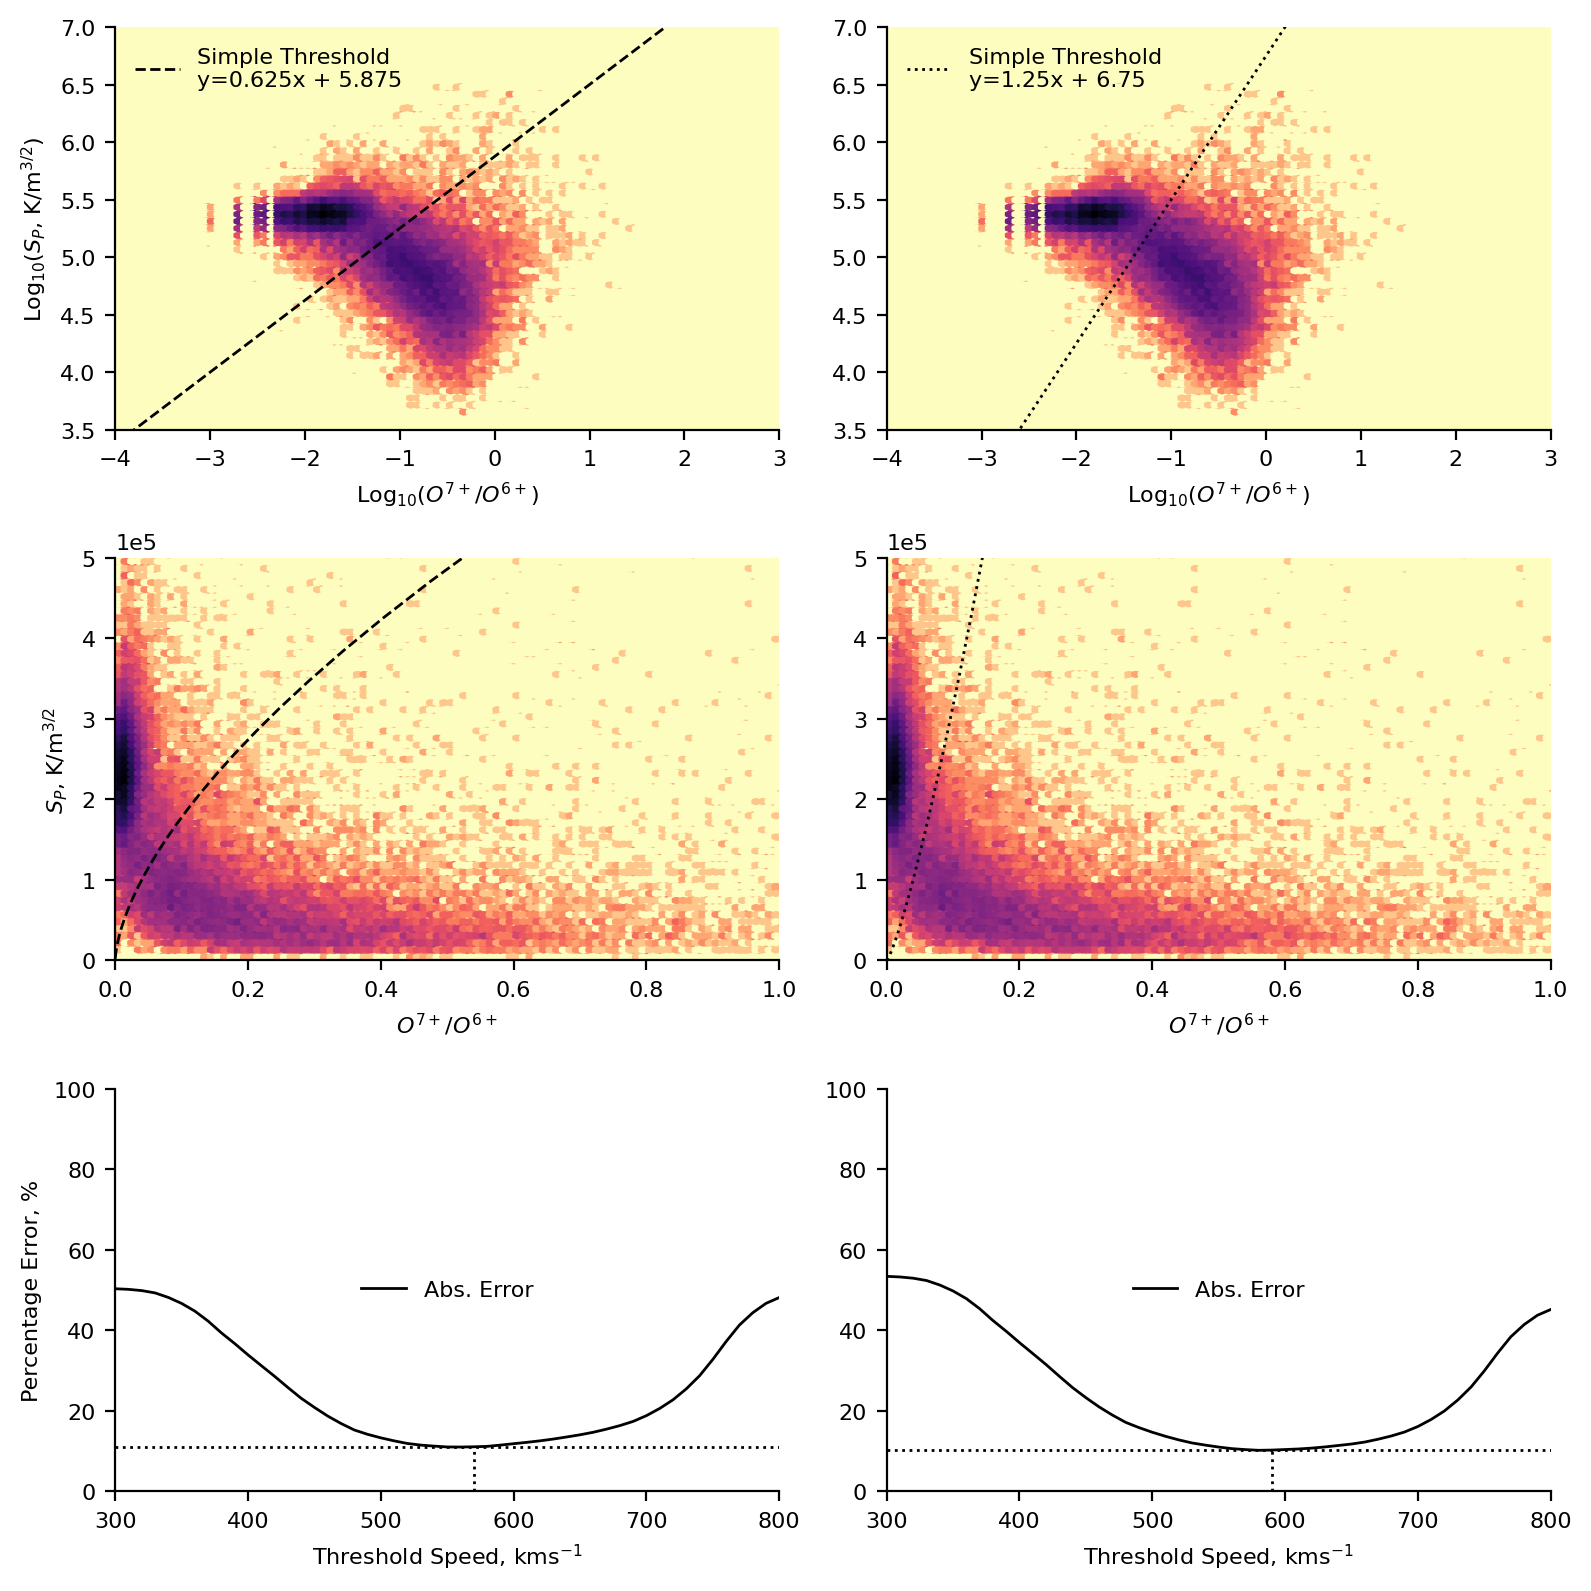

In [20]:
# Only removing NaNs in the relevant columns.
ulydata2d = ulydata.dropna(subset=['o7_o6','Sp'])

plt.figure(figsize=(8,8),dpi=200)
axs = np.array([plt.subplot(3,2,i+1) for i in range(6)])

# Plotting both log-space histograms.
[i.hexbin(np.log10(ulydata2d.o7_o6),np.log10(ulydata2d.Sp),
          gridsize=100,cmap='magma_r',bins='log',
          extent=(-4,3,3.5,7))
 for i in axs[:2]]

# Calculating the values along the classification boundary.
sep1 = np.linspace(-4,3,100)*0.625 + 5.875
sep2 = np.linspace(-4,3,100)*1.25 + 6.75
# Plotting the classification boundary.
[i.plot(np.linspace(-4,3,100),j,c='k',linestyle=k,linewidth=1,
        label="Simple Threshold\ny={}x + {}".format(grad,inter))
 for i,j,grad,inter,k in zip(axs[:2],[sep1,sep2],
                             [0.625,1.25],[5.875,6.75],['--',':'])]

#######

# Plotting real-space histograms
[i.hexbin(ulydata2d.o7_o6,ulydata2d.Sp,
          gridsize=100,cmap='magma_r',
          bins='log',extent=(0,1,0,5e+5))
 for i in axs[2:4]]

# Plotting real-space classification boundaries.
[i.plot(10**np.linspace(-4,3,100),10**j,c='k',linestyle=k,linewidth=1)
 for i,j,k in zip(axs[2:4],[sep1,sep2],['--',':'])]

#######

# Classifying the data based on the boundary.
ulyclass1 = [1 if np.log10(j) > (0.625*np.log10(i)) + 5.875 else 0
             for i,j in zip(ulydata2d.o7_o6, ulydata2d.Sp)]
ulyclass2 = [1 if np.log10(j) > (1.25*np.log10(i)) + 6.75 else 0
             for i,j in zip(ulydata2d.o7_o6, ulydata2d.Sp)]

# Calculating the error of the speed-threshold classification.
cl_err1 = [class_error(ulyclass1, [1 if v > i else 0 for v in ulydata2d.Vp])
           for i in range(300,810,10)]
cl_err2 = [class_error(ulyclass2, [1 if v > i else 0 for v in ulydata2d.Vp])
           for i in range(300,810,10)]

# Plotting the results.
[i.plot(np.arange(300,810,10),j,c='k',
        linewidth=1,label='Abs. Error')
 for i,j in zip(axs[4:],[cl_err1,cl_err2])]

[i.plot([300,800],[np.min(j),np.min(j)],linewidth=1,linestyle=':',c='k')
 for i,j in zip(axs[4:],[cl_err1,cl_err2])]

[i.plot([300+(np.argmin(j)+1)*10,300+(np.argmin(j)+1)*10],
        [0,np.min(j)], linewidth=1,linestyle=':',c='k')
  for i,j in zip(axs[4:],[cl_err1,cl_err2])]

[i.set_xlim(-4,3) for i in axs[:2]]
[i.set_ylim(3.5,7) for i in axs[:2]]
[i.set_xlim(0,1) for i in axs[2:4]]
[i.set_ylim(0,5e+5) for i in axs[2:4]]
[i.set_xlim(300,800) for i in axs[4:]]
[i.set_ylim(0,100) for i in axs[4:]]

[i.set_ylabel(j) for i,j in
 zip(axs[::2], ['Log$_{10}$($S_P$, K/m$^{3/2}$)',
                '$S_P$, K/m$^{3/2}$', 'Percentage Error, %'])]
[i.set_xlabel(j) for i,j in
 zip(axs, ['Log$_{10}$($O^{7+}$/$O^{6+}$)', 'Log$_{10}$($O^{7+}$/$O^{6+}$)',
           '$O^{7+}$/$O^{6+}$', '$O^{7+}$/$O^{6+}$',
           'Threshold Speed, kms$^{-1}$', 'Threshold Speed, kms$^{-1}$'])]

[i.ticklabel_format(axis='y',style='sci',scilimits=(0,0)) for i in axs[2:4]]

[i.legend(loc='upper left',frameon=False) for i in axs[:2]]
[i.legend(loc='center',frameon=False) for i in axs[4:]]

sns.despine()
plt.tight_layout()
clear_output()
plt.show()

## Bayesian Gaussian Mixture Model

Through the intuitive scheme presented above, we have a baseline for comparing more complex methods. To demonstrate the efficacy of unsupervised machine learning approaches, we will take the same parameter space used for the intuitive scheme and instead use a Bayesian Gaussian Mixture model to classify the data.

In essence, this technique aims to fit a specified number of Gaussians to the data by iteratively fitting to the data, calculating how good the fit is and then refitting the distributions. Due to both the relative-simplicity of the method and scientist's familiarity with applying Gaussians to data, such a technique is a good place to start with unsupervised machine learning.

Whilst it is possible to fit n-dimensional Gaussian mixtures, we retain the same parameter space so that the results can be interpreted and visualised more simply, allowing us to understand how our results are derived (making this technique less of a black-box).

#### Preproccessing

One difference to the data preparation in comparison to the intuitive scheme is that we do not now fit our model on the whole dataset. Unsupervised learning is often simple to apply to data, but requires a certain amount of knowledge and finesse to actually yield meaningful answers. As the old computing addage goes "garbage in, garbage out" ([The Hammond Times, 1957](https://www.newspapers.com/clip/50687334/the-times/)).

To this end, we have already applied domain-specific knowledge to identify the specific parameters that we believe are most likely to contain the latent information about source regions on the Sun. We now add a further constraint to the data we pass to the algorithm. Instead of using all the data, we use a subset of the data known as the 'fast-pass latitude-scans'. These latitude scans represent the perihelion portions of the orbit (where the spacecraft is closest to the Sun), where Ulysses samples almost 180$^{\circ}$ of heliospheric latitude. Such data is less biased to specific latitudes than if the whole dataset were to be considered (the aphelion of the orbit, where the spacecraft travels slowest, samples significantly more data from the ecliptic plane and is considerably further out in the heliosphere).

In the following code, we specify the start and end dates of the latitude scans and create a boolean list of whether or not samples are part of the latitude scan data. Converting the list to an array we apply the booleans as indices to our Ulysses data, leaving us with only the latitude scan periods.

In [21]:
# Extracting lat-scan/training data
ls1_s = dt.datetime(1994,8,15)
ls1_e = dt.datetime(1995,8,20)
ls2_s = dt.datetime(2000,11,1)
ls2_e = dt.datetime(2001,11,1)
ls3_s = dt.datetime(2007,2,1)
ls3_e = dt.datetime(2008,2,1)

ls_idx = [True 
          if ((idx >= ls1_s) & (idx <= ls1_e)) or
          ((idx >= ls2_s) & (idx <= ls2_e)) or
          ((idx >= ls3_s) & (idx <= ls3_e))
          else False for idx in ulydata2d.index]

lat_scans = ulydata2d[np.array(ls_idx)]

We then take out latitude scan data and standardise it using scikit-learn's StandardScaler. Here we are standardising rather than taking the logarithms for two main reasons:
1. Many machine learning techniques are sensitive to features having vastly different variances (heteroscedastic data). In our case, this takes the form of there being data with different magnitudes (e.g., the charge state ratios are much less than the proton-specific entropy). Standardising allows us to scale the data so that all the features have more similar ranges.
2. If we were to fit our data in log-space, it would be more difficult to interpret the classification boundaries in real-space.

In [22]:
# Scaling Data
scaler = SS().fit(lat_scans[['o7_o6','Sp']])

ls_scaled = scaler.transform(lat_scans[['o7_o6','Sp']])

#### The Model

With our data selected and processed into an ML-ready format, we can now fit our model. To do so we must select some model hyperparameters:
- n_components - the number of Gaussians in the mixture (this is essentially the number of classes we expect).
- n_init - how many models are fit. The final model is chosen as the model with the highest lower bound of the likelihood (see [Bloch et al.](https://link.springer.com/article/10.1007/s11207-020-01609-z) for more information).
- tol - when the change in the likelihood is less than the tolerance, the iterative fitting process ends.
- init_params - the method used to initialise the weights, means and covariances of the mixture during each initialisation.

One immediately-obvious downside to the set-up we use here is the *a priori* specification of the number of clusters. However, this classification is still useful; it allows us to quantify the decision boundary between the classes mathematically, rather than the subjective line drawn in the intuitive scheme. A further benefit is that this model can be used to classify points probabilistically rather than deterministically (though we don't make use of this in our study). We also specify that the algorithm should seach for 3 clusters rather than the two we found previously, allowing for the possibility that the model may deduce additional information.

We take our fit model, and apply it to predict the labels of all the training data so that we can see what the classification looks like.

In [23]:
bgm = BGM(n_components=3,n_init=100,
          tol=1e-5,init_params='random').fit(ls_scaled)

ls_c = bgm.predict(ls_scaled)

N.B., one alternative to specifying the number of components in the Gaussian mixture, is to set the number extremely high. When the model is fit, one can extract the weights corresponding to each component, and set a threshold rate for inlcusion into the final model. We don't do this as it involves a subjective choice which we felt less confident in making.

#### Plotting Training Results

Below we plot the training data, and the model-derived classification boundaries and centroids. Based on our understanding of the physical mechanisms governing the solar wind properties, we infer that cluster 1 represents coronal hole wind, while cluster 2 represents streamer-belt wind. We can also see that cluster 3 is located far from most of the data, capturing what initially appears to be outliers.

To investigate whether our physical interpretation is correct, we subsequently plot the normalised distribution of solar wind (proton) speed for each of the clusters. We observe that cluster 1 comprises fast solar wind, cluster 2 comprises slow solar wind, and cluster 3 comprises a broader intermediate solar wind. Note, that there is significantly less cluster 3 data than the others, as can be seen in the legend parentheses denoting the number of data-points in each cluster. The distributions relating to clusters 1 and 2 confirm our assumed source regions, and cluster 3 poses an interesting result in the context of a speculated intermediate solar wind which others have investigated.

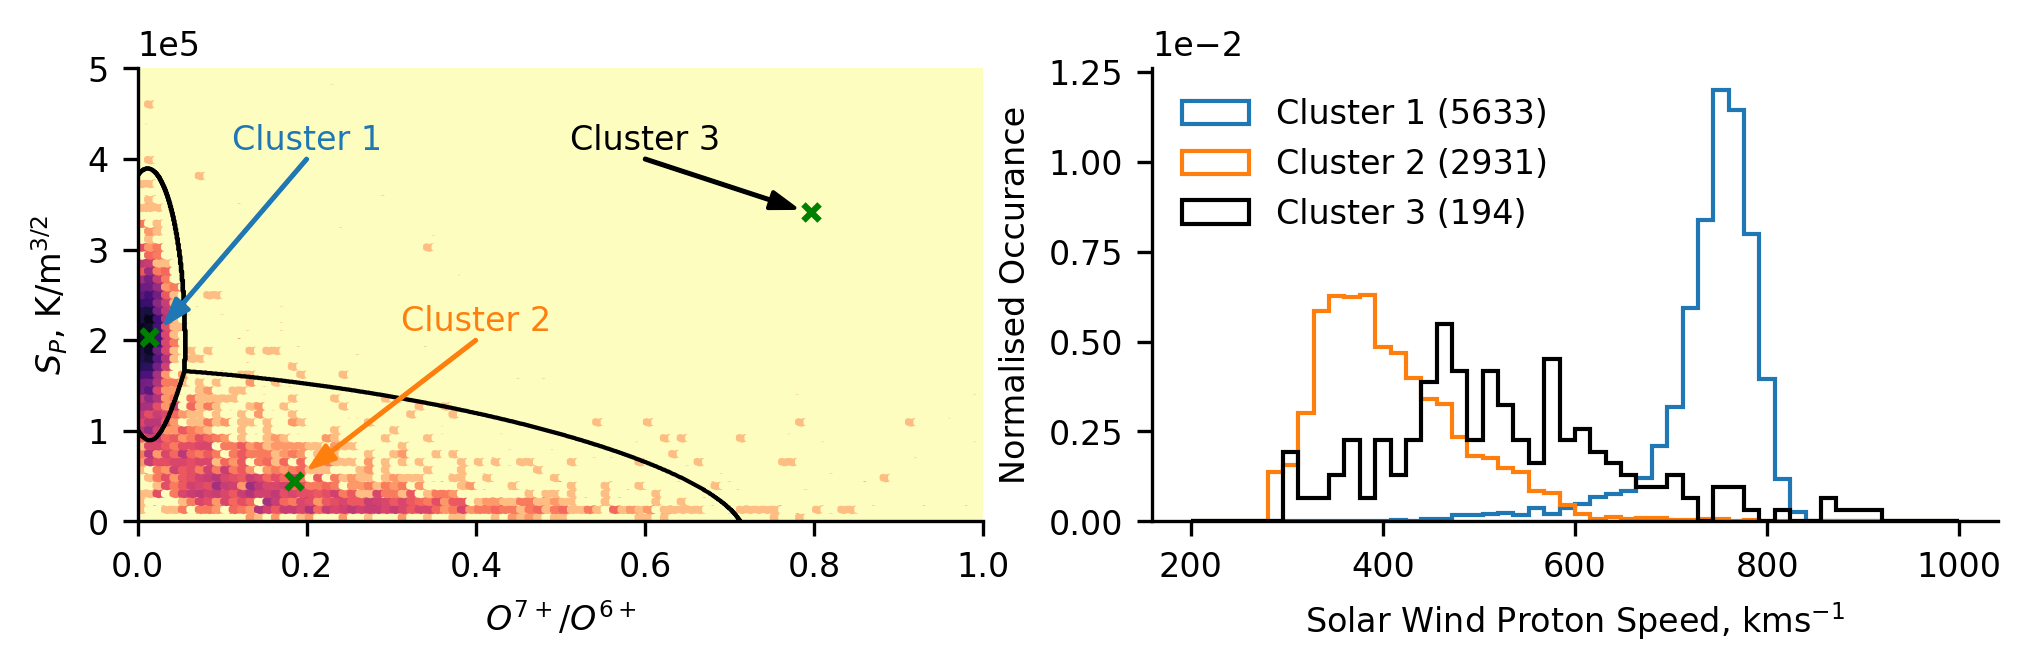

In [24]:
plt.figure(figsize=(8,2),dpi=300)
axs = [plt.subplot(1,2,i+1) for i in range(2)]

# Data distribution
cmap1 = copy.copy(plt.cm.magma_r)
hb1 = axs[0].hexbin(lat_scans.o7_o6, lat_scans.Sp, gridsize=100,
                    extent=(0,1,0,5e+5), bins='log', cmap=cmap1,
                    vmin=1)
hb1.cmap.set_under('#ededed')

# Decision Boundaries
n_points = 1000
grid = [[i,j] for i in np.linspace(0,1,n_points)
        for j in np.linspace(0,5e+5,n_points)]
grid = np.array(grid)

grid_c = bgm.predict(scaler.transform(grid))

axs[0].contour(np.linspace(0,1,n_points), np.linspace(0,5e+5,n_points),
               grid_c.reshape(n_points,n_points).T, levels=1, colors='k',
               linewidths=1)

# Centres and text
mean_pos = scaler.inverse_transform(bgm.means_)
[axs[0].scatter(mean_pos[i,0],mean_pos[i,1],marker='x',s=15,c='g')
 for i in range(3)]

arr_ofs = np.array([[0.02,0.15e+5], [0.02,0.15e+5], [-0.02,+0.05e+5]])
text_pos = np.array([[0.2,4e+5],[0.4,2e+5],[0.6,4e+5]])

[axs[0].annotate('',mean_pos[j]+arr_ofs[j],text_pos[j],
                 arrowprops=dict(facecolor=k,edgecolor=k,
                                 width=0.2,headwidth=4,headlength=6))
 for j,k in zip(range(3), ['C0','C1','k'])]

[axs[0].text(text_pos[j,0], text_pos[j,1]+0.1e+5, i,
             horizontalalignment='center',color=k)
 for i,j,k in zip(['Cluster 1','Cluster 2','Cluster 3'],
                range(3), ['C0','C1','k'])]

# Distribution of Solar Wind Speed
[axs[1].hist(lat_scans[ls_c==i].Vp, histtype='step',
             bins=50, color=j, density=True, range=(200,1000),
             label='Cluster {} ({})'.format(i+1,len(lat_scans[ls_c==i])))
 for i,j in zip(range(3),['C0','C1','k'])]

axs[0].set_ylabel('$S_P$, K/m$^{3/2}$')
axs[0].set_xlabel('$O^{7+}$/$O^{6+}$')
axs[1].set_ylabel('Normalised Occurance')
axs[1].set_xlabel('Solar Wind Proton Speed, kms$^{-1}$')

[i.ticklabel_format(axis='y',style='sci',scilimits=(0,0)) for i in axs]
plt.legend(loc='upper left',frameon=False)
sns.despine()

plt.show()

#### Classifying all of Ulysses' data

Having trained our model on the latitude-scan data, we now prepare the whole dataset to be classified. To do so, we standardise the data using the transform determined by the training data (ensuring we don't alter the data by standardising it differently). Then we predict the class labels for each data point.

In [25]:
uly_scaled = scaler.transform(ulydata2d[['o7_o6','Sp']])
uly_c = bgm.predict(uly_scaled)

Again we plot the distribution of the data, allowing us to compare the classification scheme to the distribution of the whole dataset in the space of the classification scheme. Here, we can again see that the data comprising the third cluster looks to be the tail ends of cluster 1 and 2. Despite this, we maintain that the third cluster is useful. The third cluster catches the data which is difficult to classify into either of the other two groups.

We further plot the percentage error (as before) of classifying the data using the solar wind speed alone. This has been done in two ways, one including the third cluster, one not. The latter allows us to compare the accuracy of speed classifications to only the coronal hole and streamer-belt solar wind (hence the lower error values). We posit that this is not a fair comparison, as it does not take into account the data which would inherently be most tricky for speed thresholding to capture - the intermediate-speed solar wind (cluster 3). Including the third cluster gives us significantly higher errors since there is a cluster that will always be misclassified by speed thresholding (though if cluster 3 represents a distinct solar wind type, then this higher error is entirely valid).

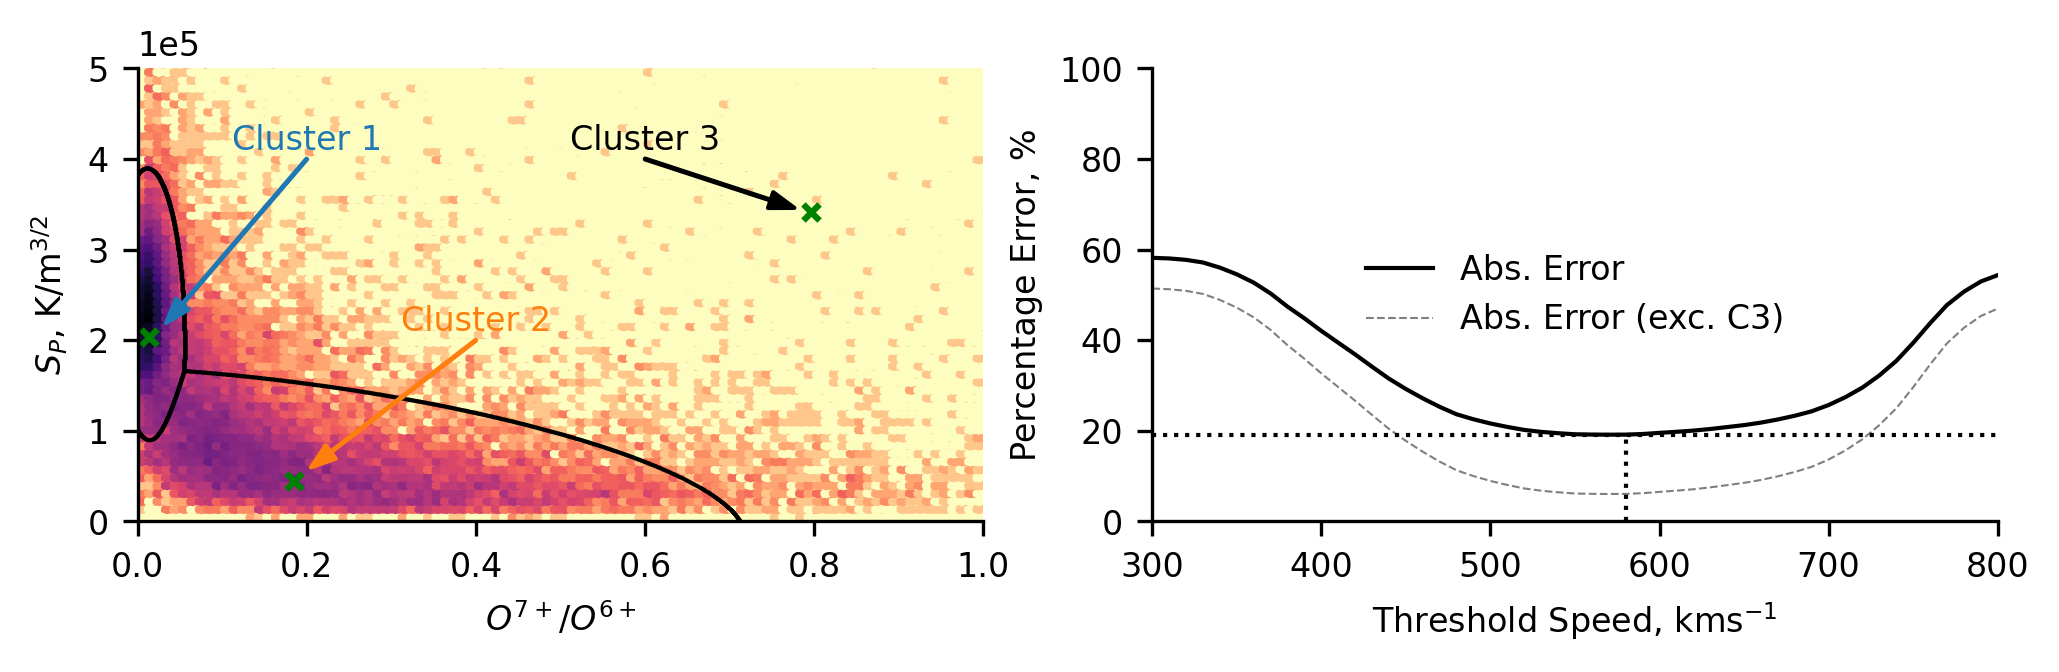

In [26]:
plt.figure(figsize=(8,2),dpi=300)
axs = [plt.subplot(1,2,i+1) for i in range(2)]

# Data Distribution
axs[0].hexbin(ulydata2d.o7_o6, ulydata2d.Sp, gridsize=100,
              extent=(0,1,0,5e+5), bins='log', cmap='magma_r')

# Decision Boundaries
axs[0].contour(np.linspace(0,1,n_points), np.linspace(0,5e+5,n_points),
               grid_c.reshape(n_points,n_points).T, levels=1, colors='k',
               linewidths=1)

# Centres and text
[axs[0].scatter(mean_pos[i,0],mean_pos[i,1],marker='x',s=15,c='g')
 for i in range(3)]
 
[axs[0].annotate('',mean_pos[j]+arr_ofs[j],text_pos[j],
                 arrowprops=dict(facecolor=k,edgecolor=k,
                                 width=0.2,headwidth=4,headlength=6))
 for j,k in zip(range(3), ['C0','C1','k'])]

[axs[0].text(text_pos[j,0], text_pos[j,1]+0.1e+5, i,
             horizontalalignment='center',color=k)
 for i,j,k in zip(['Cluster 1','Cluster 2','Cluster 3'],
                range(3), ['C0','C1','k'])]

# Classification Error
cl_err = [class_error(uly_c, [0 if v > i else 1 for v in ulydata2d.Vp])
           for i in range(300,810,10)]
cl_err_u = [class_error(uly_c[uly_c!=2],
                        [0 if v > i else 1 for v in ulydata2d.Vp[uly_c!=2]])
           for i in range(300,810,10)]

axs[1].plot(np.arange(300,810,10),cl_err,c='k',
            linewidth=1,label='Abs. Error')
axs[1].plot(np.arange(300,810,10),cl_err_u,c='k',alpha=0.5,
            linewidth=0.5,linestyle='--',label='Abs. Error (exc. C3)')

axs[1].plot([300,800],[np.min(cl_err),np.min(cl_err)],
            linewidth=1,linestyle=':',c='k')
axs[1].plot([300+(np.argmin(cl_err)+1)*10,300+(np.argmin(cl_err)+1)*10],
            [0,np.min(cl_err)],
            linewidth=1,linestyle=':',c='k')

axs[0].set_ylabel('$S_P$, K/m$^{3/2}$')
axs[0].set_xlabel('$O^{7+}$/$O^{6+}$')
axs[1].set_ylabel('Percentage Error, %')
axs[1].set_xlabel('Threshold Speed, kms$^{-1}$')

axs[0].ticklabel_format(axis='y',style='sci',scilimits=(0,0))
axs[1].set_ylim(0,100)
axs[1].set_xlim(300,800)
axs[1].legend(loc='center',frameon=False)
sns.despine()

plt.show()

#### Classifying all of ACE's Data

We now move on to classifying the data from ACE. As before, the first step is to downselect and standardise the data. We again, apply the same standardisation transform determined using the latitude-scan data from Ulysses. This process involves two assumptions:
1. The underlying distributions of the data remain the same (hence we can apply the same standardisation).
2. There are no intercalibration issues between the measurements made by both spacecraft.

Regarding 1., the ACE data is obtained closer to the Sun than Ulysses (1 a.u. versus Ulysses' closest approach of around 1.3 a.u.) and limited exclusively to the ecliptic plane where the solar wind is typically slower and more likely to contain contamination from stream-interaction regions. The former is likely to not be a significant issue due to the choice of non-evolving parameters. The latter may affect the data due to heating or other similar effects from the shock regions between the streams. Regarding 2., we assume that the data from both missions has been sufficiently calibrated so that measurements reflect the true values.

In [27]:
# Only dropping from relevant rows.
acedata2d = acedata.dropna(subset=['o7_o6','Sp'])

ace_scaled = scaler.transform(acedata2d[['o7_o6','Sp']])
ace_c = bgm.predict(ace_scaled)

Plotting the distribution of the ACE data highlights how the data distribution is shifted. We see that a significantly increased portion of the data is found to be in cluster 2, whereas for Ulysses the majority of the data was in cluster 1. This general trend is expected, as ACE measures the solar wind in the ecliptic plane, where it is predominantly not from coronal hole regions. There does appear to be a dense region on the classification region between cluster 1 and 2, potentially indicating that the proton-specific entropy associated with the coronal hole wind is reduced. This could be due to stream interaction regions (increased density would decrease the entropy) and/or due to some radial dependence of the entropy. We will comment more on this below when we make comparisons with the Ulysses classification, and when we compare this scheme to the UMAP scheme later.

When comparing this classification scheme to the speed thresholding, we see a differently shaped distribution of results. This reflects the fact that the ACE data is heavily biased towards slower solar wind (Cluster 2). Hence, when the errors are calculated, the lower speed thresholds misclassify more data and the error is high. In contrast, the error is low for the higher thresholds because much more of the data is below the threshold and hence correctly classified. We still see a non-negligible discrepancy between the this unsupervised approach and the simplistic two-type paradigm.

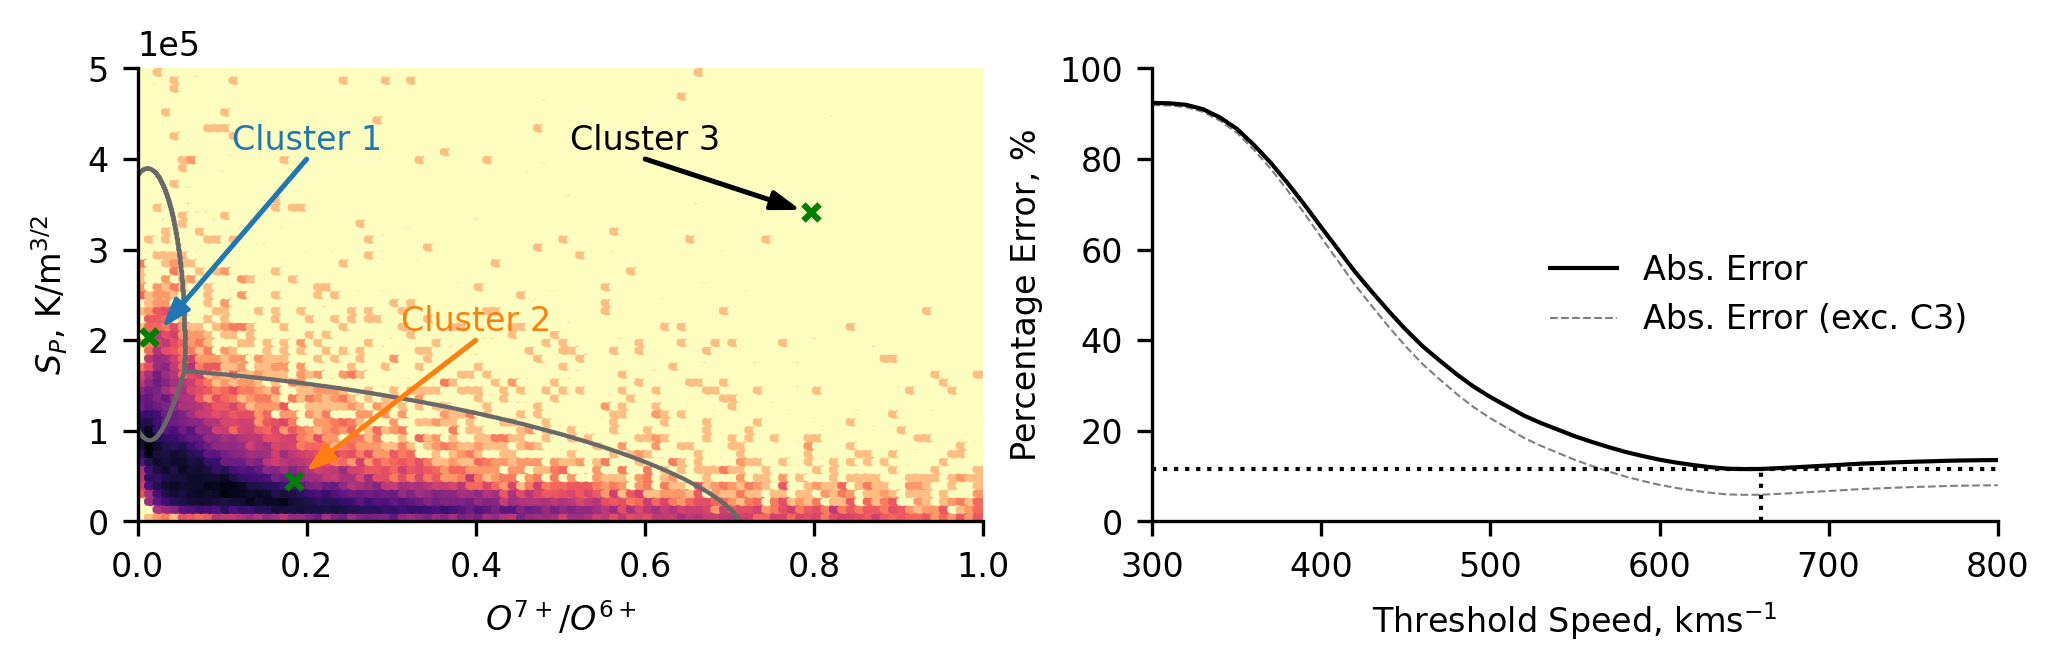

In [28]:
plt.figure(figsize=(8,2),dpi=300)
axs = [plt.subplot(1,2,i+1) for i in range(2)]

# Data distribution
axs[0].hexbin(acedata2d.o7_o6, acedata2d.Sp, gridsize=100,
              extent=(0,1,0,5e+5), bins='log', cmap='magma_r')

# Decision Boundaries
axs[0].contour(np.linspace(0,1,n_points), np.linspace(0,5e+5,n_points),
               grid_c.reshape(n_points,n_points).T,levels=1,colors='dimgray',
               linewidths=1)

# Centres and text
[axs[0].scatter(mean_pos[i,0],mean_pos[i,1],marker='x',s=15,c='g')
 for i in range(3)]
 
[axs[0].annotate('',mean_pos[j]+arr_ofs[j],text_pos[j],
                 arrowprops=dict(facecolor=k,edgecolor=k,
                                 width=0.2,headwidth=4,headlength=6))
 for j,k in zip(range(3), ['C0','C1','k'])]

[axs[0].text(text_pos[j,0], text_pos[j,1]+0.1e+5, i,
             horizontalalignment='center',color=k)
 for i,j,k in zip(['Cluster 1','Cluster 2','Cluster 3'],
                range(3), ['C0','C1','k'])]

# Classification Error
cl_err = [class_error(ace_c, [0 if v > i else 1 for v in acedata2d.Vp])
           for i in range(300,810,10)]
cl_err_u = [class_error(ace_c[ace_c!=2],
                        [0 if v > i else 1 for v in acedata2d.Vp[ace_c!=2]])
           for i in range(300,810,10)]

axs[1].plot(np.arange(300,810,10),cl_err,c='k',
            linewidth=1,label='Abs. Error')
axs[1].plot(np.arange(300,810,10),cl_err_u,c='k',alpha=0.5,
            linewidth=0.5,linestyle='--',label='Abs. Error (exc. C3)')

axs[1].plot([300,800],[np.min(cl_err),np.min(cl_err)],
            linewidth=1,linestyle=':',c='k')
axs[1].plot([300+(np.argmin(cl_err)+1)*10,300+(np.argmin(cl_err)+1)*10],
            [0,np.min(cl_err)],
            linewidth=1,linestyle=':',c='k')

axs[0].set_ylabel('$S_P$, K/m$^{3/2}$')
axs[0].set_xlabel('$O^{7+}$/$O^{6+}$')
axs[1].set_ylabel('Percentage Error, %')
axs[1].set_xlabel('Threshold Speed, kms$^{-1}$')

axs[0].ticklabel_format(axis='y',style='sci',scilimits=(0,0))
axs[1].set_ylim(0,100)
axs[1].set_xlim(300,800)
axs[1].legend(loc='right',frameon=False)
sns.despine()

plt.show()

#### Comparing the Inter-Spacecraft and Intra-Cluster Proton Speed distributions

We now make our first direct comparisons between the classification results of both Ulysses and ACE. In the top two plots we present histograms of the solar wind speed for all the clusters in each of Ulysses and ACE, giving us an overall impression of the solar wind measured by both. In the lower three panels we plot each of the solar wind classifications from both spacecraft, allowing us to compare and contrast the distribution of each classification type.

N.B. the difference in the extents over which the histograms are binned between the plots. The top two plots present 100 bins between 200-1000 kms$^{-1}$, whereas the lower three plots present 100 bins over the respective extent of the data in the classification for each spacecraft. This is why the counts change between the plots.

Comparing the speed distributions between the spacecraft, we can immediately see the differences in the sampled solar wind mentioned earlier (only a token amount of coronal hole wind is sampled by ACE). Despite this, when we look at the lower three panels, we observe similar distributions for both clusters 2 and 3. A noteable difference in the cluster 2 distributions is the heavy tail of the ACE data. This heavy tail is expected due to stream interactions - when faster solar wind catches up with slower wind, the slower wind is sped up. This effect is also mirrored in the cluster 1 distributions, where the ACE data is generally slower.

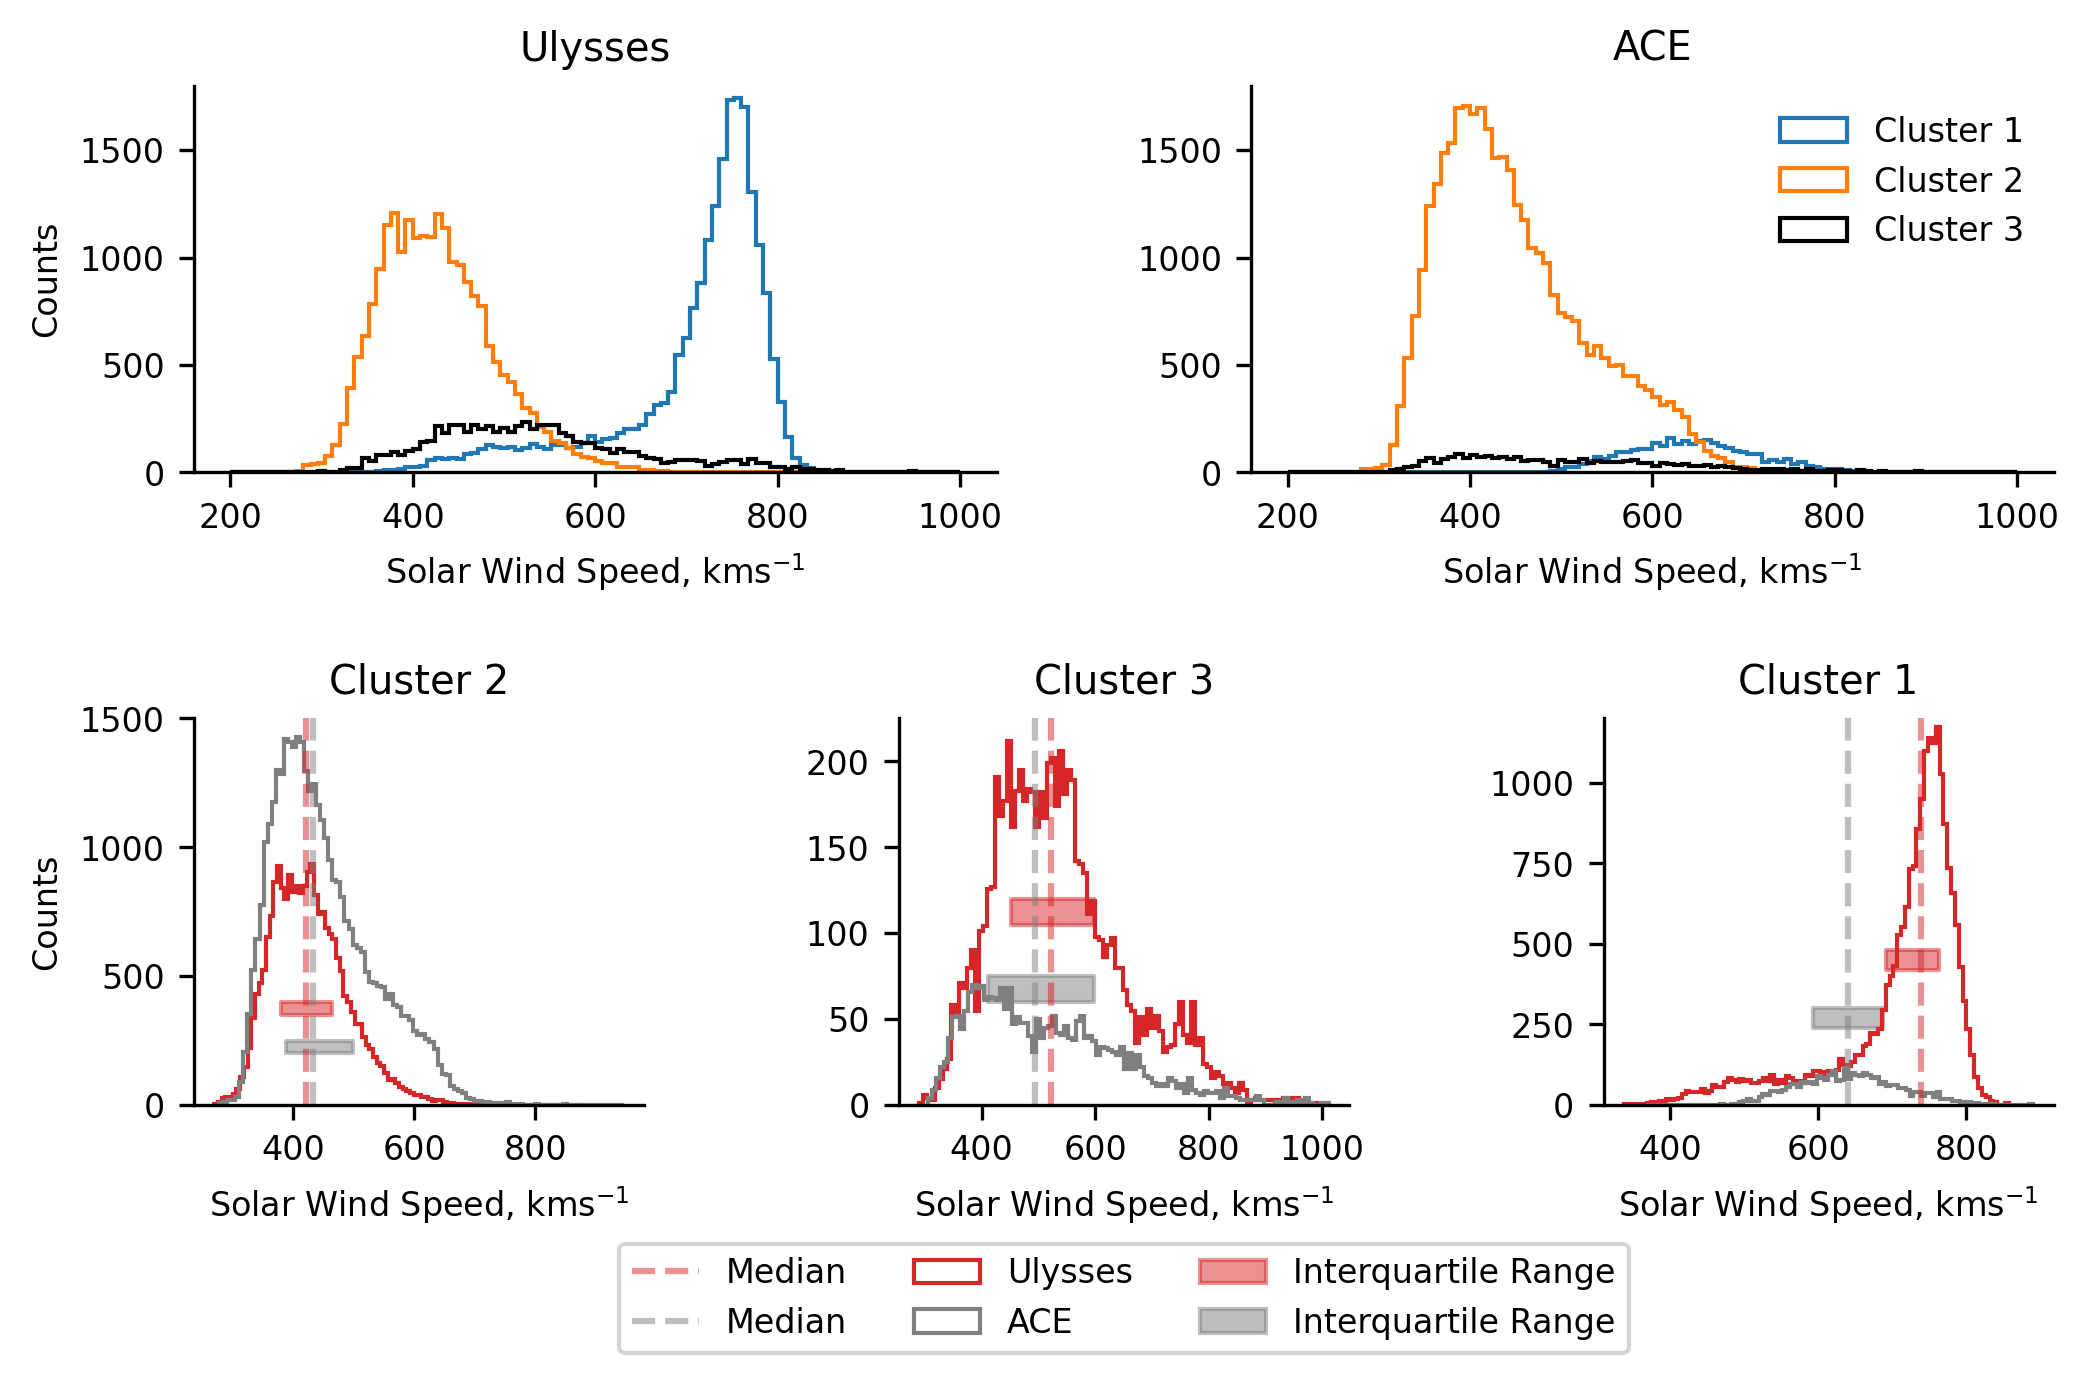

In [29]:
plt.figure(figsize=(8,4.5),dpi=300)
gs = gridspec.GridSpec(5,16)

axs1 = [plt.subplot(gs[0:2,i:i+7]) for i in [0,9]]
axs2 = [plt.subplot(gs[3:,i:i+4]) for i in [0,6,12]]

# The speed distributions of each spacecraft
[i.hist(j[k == l].Vp, bins=100, histtype='step',
        range=(200,1000),color=m,label=n)
 for i,j,k in zip(axs1,[ulydata2d,acedata2d],[uly_c,ace_c])
 for l,m,n in zip([0,1,2], ['C0','C1','k'],
                  ['Cluster 1','Cluster 2','Cluster 3'])]

#######

# These complicated list comprehensions work essentially like this:
# [make plot
#  for i,j in axis/classification
#  for j,k in spacecraft/colours]

# The per-classification speed distributions
[i.hist(j[k == l], bins=100, histtype='step', color=m, label=n)
 for i,l in zip(axs2,[1,2,0])
 for j,k,m,n in zip([ulydata2d.Vp,acedata2d.Vp],[uly_c,ace_c],
                  ['tab:red','gray'],['Ulysses','ACE'])]

# Plotting the median lines
medians = [[i[j==k].median()
            for i,j in zip([ulydata2d.Vp,acedata2d.Vp],
                           [uly_c,ace_c])]
           for k in [1,2,0]]

[i.plot([j[k],j[k]],[0,2000], color=l, label='Median',
        linestyle='--',alpha=0.5)
 for i,j in zip(axs2,medians)
 for k,l in zip([0,1],['tab:red','gray'])]

# Plotting the interquartile range
quartiles = [[[i[j==k].quantile(0.25),i[j==k].quantile(0.75)]
              for i,j in zip([ulydata2d.Vp,acedata2d.Vp],
                           [uly_c,ace_c])]
             for k in [1,2,0]]

[i.fill_between(x=[j[k][0],j[k][1]], y1=[l*(0.3+m),l*(0.3+m)],
                y2=[l*(0.3+2*m),l*(0.3+2*m)],color=n,alpha=0.5,
                label='Interquartile Range')
 for i,j,l in zip(axs2,quartiles,[1000,300,1200])
 for k,m,n in zip([0,1],[0.05,-0.05],['tab:red','gray'])]

# Formatting
[i.set_ylim(0,1800) for i in axs1]
[i.set_ylim(0,j) for i,j in zip(axs2,[1500,225,1200])]
[i.set_xlabel('Solar Wind Speed, kms$^{-1}$') for i in axs1+axs2]
[i.set_ylabel('Counts') for i in [axs1[0],axs2[0]]]
[i.set_title(j) for i,j in zip(axs1+axs2,['Ulysses','ACE','Cluster 2',
                                          'Cluster 3', 'Cluster 1'])]
axs1[1].legend(loc='upper right',frameon=False)
axs2[1].legend(bbox_to_anchor=(0.5,-0.5),loc='center',ncol=3)
sns.despine()
clear_output()
plt.show()

We determine that the similarity between the cluster 2 data signifies that the model does capture at least some of the latent information present in the simple parameter space being investigated. Additionally, the distribution of ACE's cluster 1 (broadly Gaussian) does not seem to be unexplainably different to Ulysses. The fact that is generally comprises slower solar wind can be attributed to both the fact that stream interaction regions would act to slow the solar wind, and the solar wind being sampled by Ulysses. The latter point speaks to some of the effects we observe in later analysis too. Given Ulysses' orbit, it samples very large, polar coronal holes. Due to this, there is more 'pure' coronal hole wind, which is likely to be faster.

In Ulysses' cluster 1, we see that there slow-speed tail to the distribution, appearing almost as a slight secondary peak. This is not expected. We invetigate this data in the following section.

#### What is the Bump in the Ulysses Coronal Hole Wind?

To understand the bump in the coronal hole wind observed in the Ulysses classification, we investigated the source of the data. Initially, we did this temporally as well as spatially, but we discovered that the cause may be deduced simply from the spatial data, so only that is presented here.

As far as the spatial distribution goes, there are two aspects, radial distance and latitude. In the case of Ulysses' orbit, these are interrelated (the peri- and aphelion of the orbit occur roughly in the ecliptic plane) allowing us to simply plot the distribution of the data radially. We make the assumption that bump represents a distinct population in the data and that it can be linearly separated from the coronal hole wind. These assumptions are rather crude, but allow us to understand the source of the secondary peak regardless.

The following plot presents the radial distribution of data obtained when Ulysses' coronal hole wind cluster is split into two groups above and below 600 kms$^{-1}$. We observe that the bump data (< 600 kms$^{-1}$) is preferentially observed at the lowest and highest radial distances. Since it is observed at both locations, we infer that the bump originates in from data measured close to the ecliptic plane. We hypothesise that the cause of this is due to stream interaction regions (which predominantly occur close to the ecliptic plane), either by heating or affecting the ambient density.

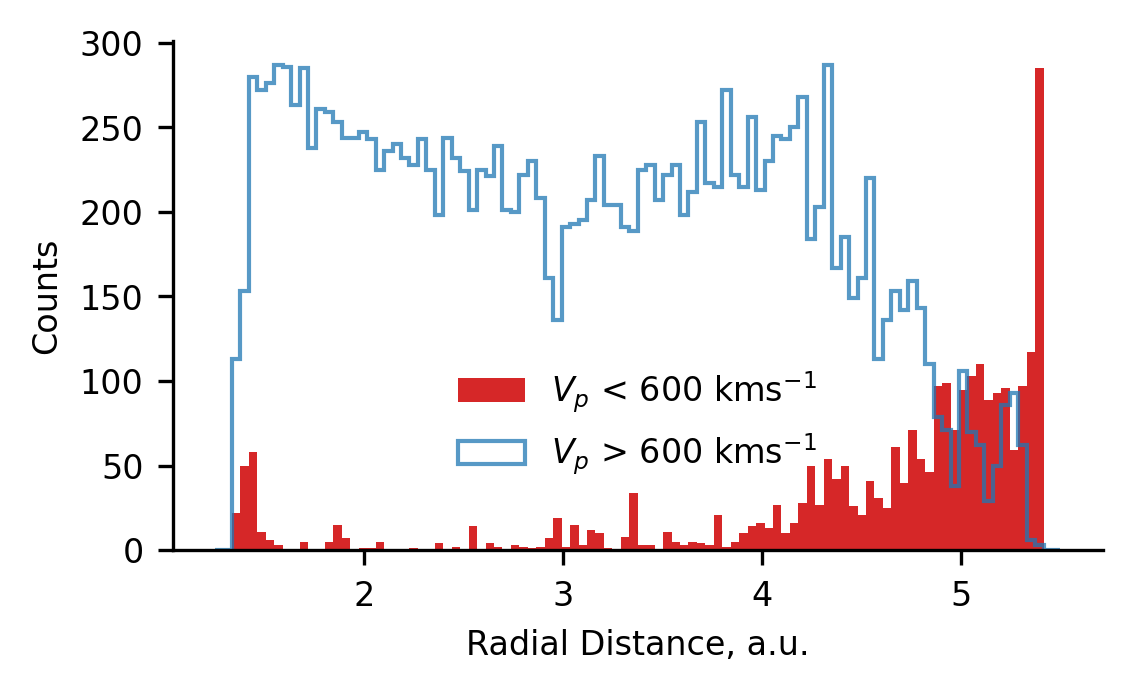

In [30]:
plt.figure(figsize=(4,2.25), dpi=300)

plt.hist(ulydata2d[(ulydata2d.Vp < 600) & (uly_c==0)].R,
         bins=100, range=(1.25,5.5),
         histtype='stepfilled',color='tab:red',
         label='$V_p$ < 600 kms$^{-1}$')

plt.hist(ulydata2d[(ulydata2d.Vp > 600) & (uly_c==0)].R,
         bins=100, range=(1.25,5.5),
         histtype='step',color='C0',linewidth=1,alpha=0.75,
         label='$V_p$ > 600 kms$^{-1}$')

plt.legend(loc='center',bbox_to_anchor=(0.5,0.25),frameon=False)
plt.ylabel('Counts')
plt.xlabel('Radial Distance, a.u.')
sns.despine()
plt.show()

#### Where is the Cluster 3 Data?

We previously speculated that cluster 3 may be comprised of difficult-to-classify data from the tails of the coronal hole and streamer belt wind. However, observing that the model seems to have some difficulty in classifying data in the ecliptic plane, we thought it would be prudent to investigate the spatial distribution of the cluster 3 data too.

In the following plot, we present the distribution of radial locations at which data classified as cluster 3 was measured, as well as replotting the distribution of the data in the bump of cluster 1. We see remarkable similarity in these distributions, and conclude that cluster 3 likely represents solar wind affected by same process as teh cluster 1 bump - likely to be stream interactions.

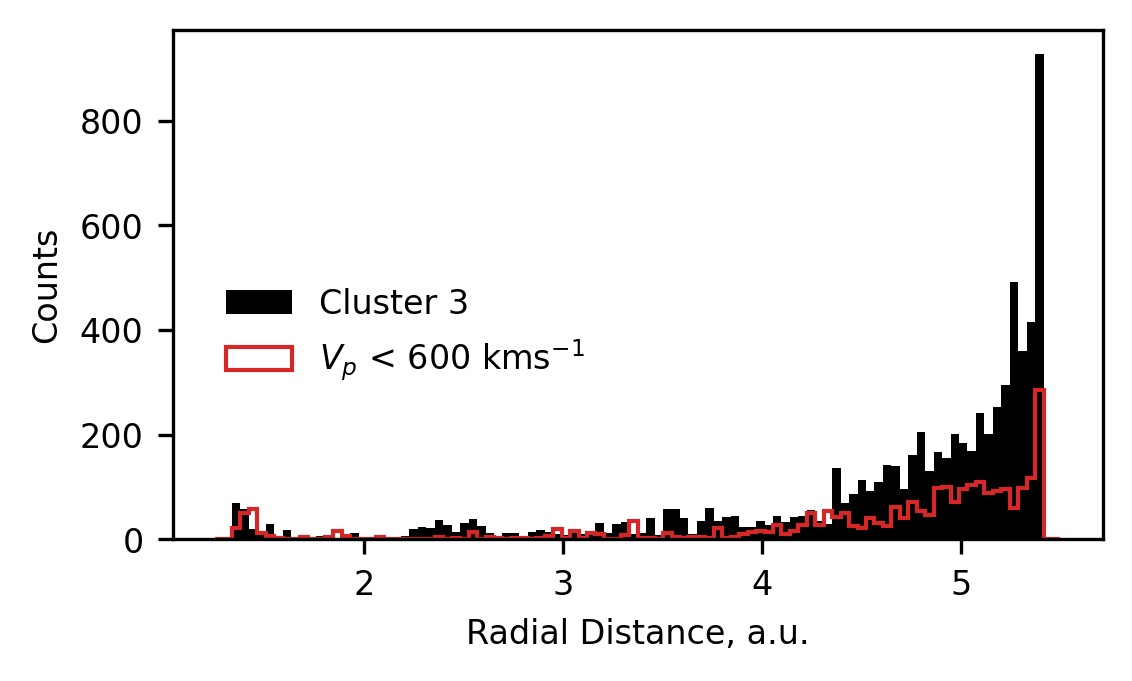

In [31]:
plt.figure(figsize=(4,2.25), dpi=300)

plt.hist(ulydata2d[uly_c==2].R,
         bins=100, range=(1.25,5.5),
         histtype='stepfilled',color='k',
         label='Cluster 3')

plt.hist(ulydata2d[(ulydata2d.Vp < 600) & (uly_c==0)].R,
         bins=100, range=(1.25,5.5),
         histtype='step',color='tab:red',
         label='$V_p$ < 600 kms$^{-1}$')

plt.legend(loc='center',bbox_to_anchor=(0.25,0.4),frameon=False)
plt.ylabel('Counts')
plt.xlabel('Radial Distance, a.u.')
plt.show()

## UMAP Classification Model

By employing a simple 2D Bayesian Gaussian Mixture model to classify solar wind data, we have demonstrated the efficacy of unsupervised machine learning approaches. Aside from creating a classification scheme using parameters that are more informative of the solar source-regions, using unsupervised machine learning allowed for a data-driven classification boundary. This boundary can also be realised probabilistically due to the fact that each class is represented by a Gaussian distribution, giving users more flexibility in how to assign classifications than typical deterministic methods.

However, there are inherent limitations in using the Bayesian Gaussian Mixture model:
1. The number of classes has to be specified *a priori*. Thus introducing subjectivity into the results determined by the algorithm.
2. By definition, the method assumes that clusters are convex and can be described by a Gaussian distribution. This is by no means a guarantee, and evidence for different distributions in the data can be observed in the plots showing the data distributions in the classification space.
3. Moving to higher dimensional spaces reduces the interpretability of the results, as it becomes increasingly difficult to visualise the data and how it relates to classification boundaries etc.

In light of these limitations we extend this study to another classification scheme using the UMAP (Uniform Manifold and Projection; [McInnes, Healy and Melville, 2020](https://arxiv.org/abs/1802.03426)) algorithm in conjunction with the HDBSCAN (Hierarchical Density-Based Spatial Clustering of Applications with Noise; [Campello, Moulavi and Sander, 2013](https://link.springer.com/chapter/10.1007%2F978-3-642-37456-2_14)) algorithm.

UMAP is a dimension reduction algorithm which fits a manifold to high-dimensional data and subsequently finds an optimum representation of it in a lower-dimensional space, preserving the topological structure. In our case, we use it to take the six non-evolving parameters which are shared between both Ulysses and ACE, and represent it in 2D. Naïvely, one can inspect this representation and determine visually if it has found clustered structures (useful if you want to quickly try different sets of parameters without digging too deeply into the results). We choose to apply HDBSCAN, which is a density-based clustering algorithm, designed specifically for when clusters are non-convex, as is likely when using UMAP.

#### Preproccessing

As we've done many times now, we downselect the parameters we want to use for our unsupervised machine learning and drop row with NaNs.

In [32]:
ulydata6d = ulydata.dropna(subset=['o7_o6','Sp','c6_c5','q_fe','fe_o','he_h'])
ulydata6d.shape

(51057, 10)

From this down-selected and cleaned data, we extract the latitude scans as before.

In [33]:
# Extracting lat-scan/training data
ls_idx = [True 
          if ((idx >= ls1_s) & (idx <= ls1_e)) or
          ((idx >= ls2_s) & (idx <= ls2_e)) or
          ((idx >= ls3_s) & (idx <= ls3_e))
          else False for idx in ulydata6d.index]

lat_scans = ulydata6d[np.array(ls_idx)]
lat_scans.shape

(8758, 10)

We now fit a new scaler to the data (this time the MinMaxScaler from scikit-learn, as suggested by the examples in UMAP's documentation).

In [34]:
# Scaling Data
scaler = MMS().fit(lat_scans[['o7_o6','Sp','c6_c5','q_fe','fe_o','he_h']])

ls_scaled = scaler.transform(lat_scans[['o7_o6','Sp','c6_c5','q_fe','fe_o','he_h']])

#### Initialising and Fitting the Model

When specifying the UMAP model there are many hyperparameters to tune. The UMAP documentation has a section describing the ones that are of most interest ([see here](https://umap-learn.readthedocs.io/en/latest/parameters.html#)):
- n_components - specifies the dimensionality of the reduced space.
- n_neighbours - this parameter is used to inform the algorithm about what level of topological structure we are interested in. A bigger value signifies that the model should create the manifold using more points, and hence it captures the larger-scale structure (vice versa, a smaller number focuses the algorithm on representing the small scale structure).
- metric - this defines the way UMAP calculates distances in the high-dimensional space, and hence how it represents structure through the dimensional reduction.
- min_dist - this parameter controls the spatial distribution of data in the reduced representation. It simply  provides the minimum distance allowed between the points. Smaller values allow the distribution of data to be clumpier.
- spread - similar to min_dist, this parameter controls how much spread there is in the reduced-space representation of the data.

In the code below we specify the values of these parameters. We appreciate that there is subjectivity in these choices, but through various trials of different we find that the results are generally robust to changes in the values. We choose to use a neighbourhood of 40 points, giving us some balance between hyper-localised structure (e.g., a 2-point neighbourhood) and totally-global structure (e.g., ~100-point neighbourhood, or ~1% of the training data). We find that using the correlation metric provides a dimension reduction which visually shows the clusters more clearly, but find similar results using euclidean distance instead. We choose a minimum distance of 0, since we think this gives the algorithm the most freedom to accuractely represent the data in the lower-dimensional space. The spread is chosen to ensure that there is enough distance between clusters for the clustering algorithm to appropriately capture the results.

In [35]:
umap = UMAP(n_neighbors=40, metric='correlation', n_components=2,
            min_dist=0, spread=0.5).fit(ls_scaled)
ls_r = umap.transform(ls_scaled)

Applying UMAP to our solar wind data yields a representation of the 6D inputs in 2D. We then have to apply a clustering algorithm to pull out the specific groupings in the data. To do this we define a clusterer below. As with UMAP, HDBSCAN also has some subjective hyperparameters, more details can be found [here](https://hdbscan.readthedocs.io/en/latest/parameter_selection.html), but we'll elaborate on the main ones:
- min_cluster_size - relatively intuitive, this determines the minimum number of points required for the algorithm to classify a group of data as a cluster.
- min_samples - this essentially represents how conservative the algorithm is at classifying points as noise. Higher values leads the algorithm to classify more data as noise.
- prediction_data - setting this to true caches the information required to apply the trained classifier more efficiently to new data.

We choose these parameters in a way which allows the algorithm to adequately capture the visually-obvious structure in the data.

In [36]:
hdbscan = HDBSCAN(min_cluster_size=2000, min_samples=1400,
                  prediction_data=True).fit(ls_r)

ls_c = hdbscan.labels_
set(ls_c)

{0, 1}

In [37]:
ls_c2 = order_class(ls_c,lat_scans.Vp)

#### Plotting Training Results

One of the benefits of using the UMAP algorithm, is that the projection into lower-dimensional space is such that the axes are non-interpretable. This is in contrast to similar approaches such as PCA, which provide a new basis whose relations to the inputs can be easily extracted. This removes any potential bias when tweaking the hyperparameters of UMAP and HDBSCAN, since we cannot interpret anything more than simply the shapes captured by the respective methods. Once we are happy with the reduction and clustering, we can then investigate what these clusters are without worry about having biased the results with our _a priori_ assumptions.

Below we plot the results of the dimension reduction and cluster, as well as the plots we use to analyse the results. The top plot shows the lower-dimensional space, and the colour corresponds to the clusters found by HDBSCAN. We note that this result is slightly different to that in [Bloch et al. (2020)](https://link.springer.com/article/10.1007/s11207-020-01609-z), and will discuss this further in a subsequent section. The main take-away from this plot is that, in a topological sense, there are two, distinct clusters in the higher dimensional data. We can see this visually by the separation of the two groups. Additionally, we can see that there is substructure within these groups, but due to the difficulty in identifying and interpreting this, we focus only on the large-scale structures.

We know from the previous sections that there are likely at least two groups of solar wind data, but given the complex methods used to identify them it's worth being skeptical that these clusters correspond directly. To investigate this, we represent the results of the clustering in the same space as we've used in the previous sections (since we are now adept at infering what this relates to). Unlike before, we cannot simply plot the distribution of data and super-impose the classification boundary. The boundary is now non-linear and multi-dimensional. Instead we present a contour plot of the distribution of the data in each cluster. From this plot we can quickly see that, despite slight differences, the results match up well with those found previously. We have captured coronal hole and streamer belt wind. This is further reflected in the normalised histograms of the distribution of the solar wind speed of each cluster. 

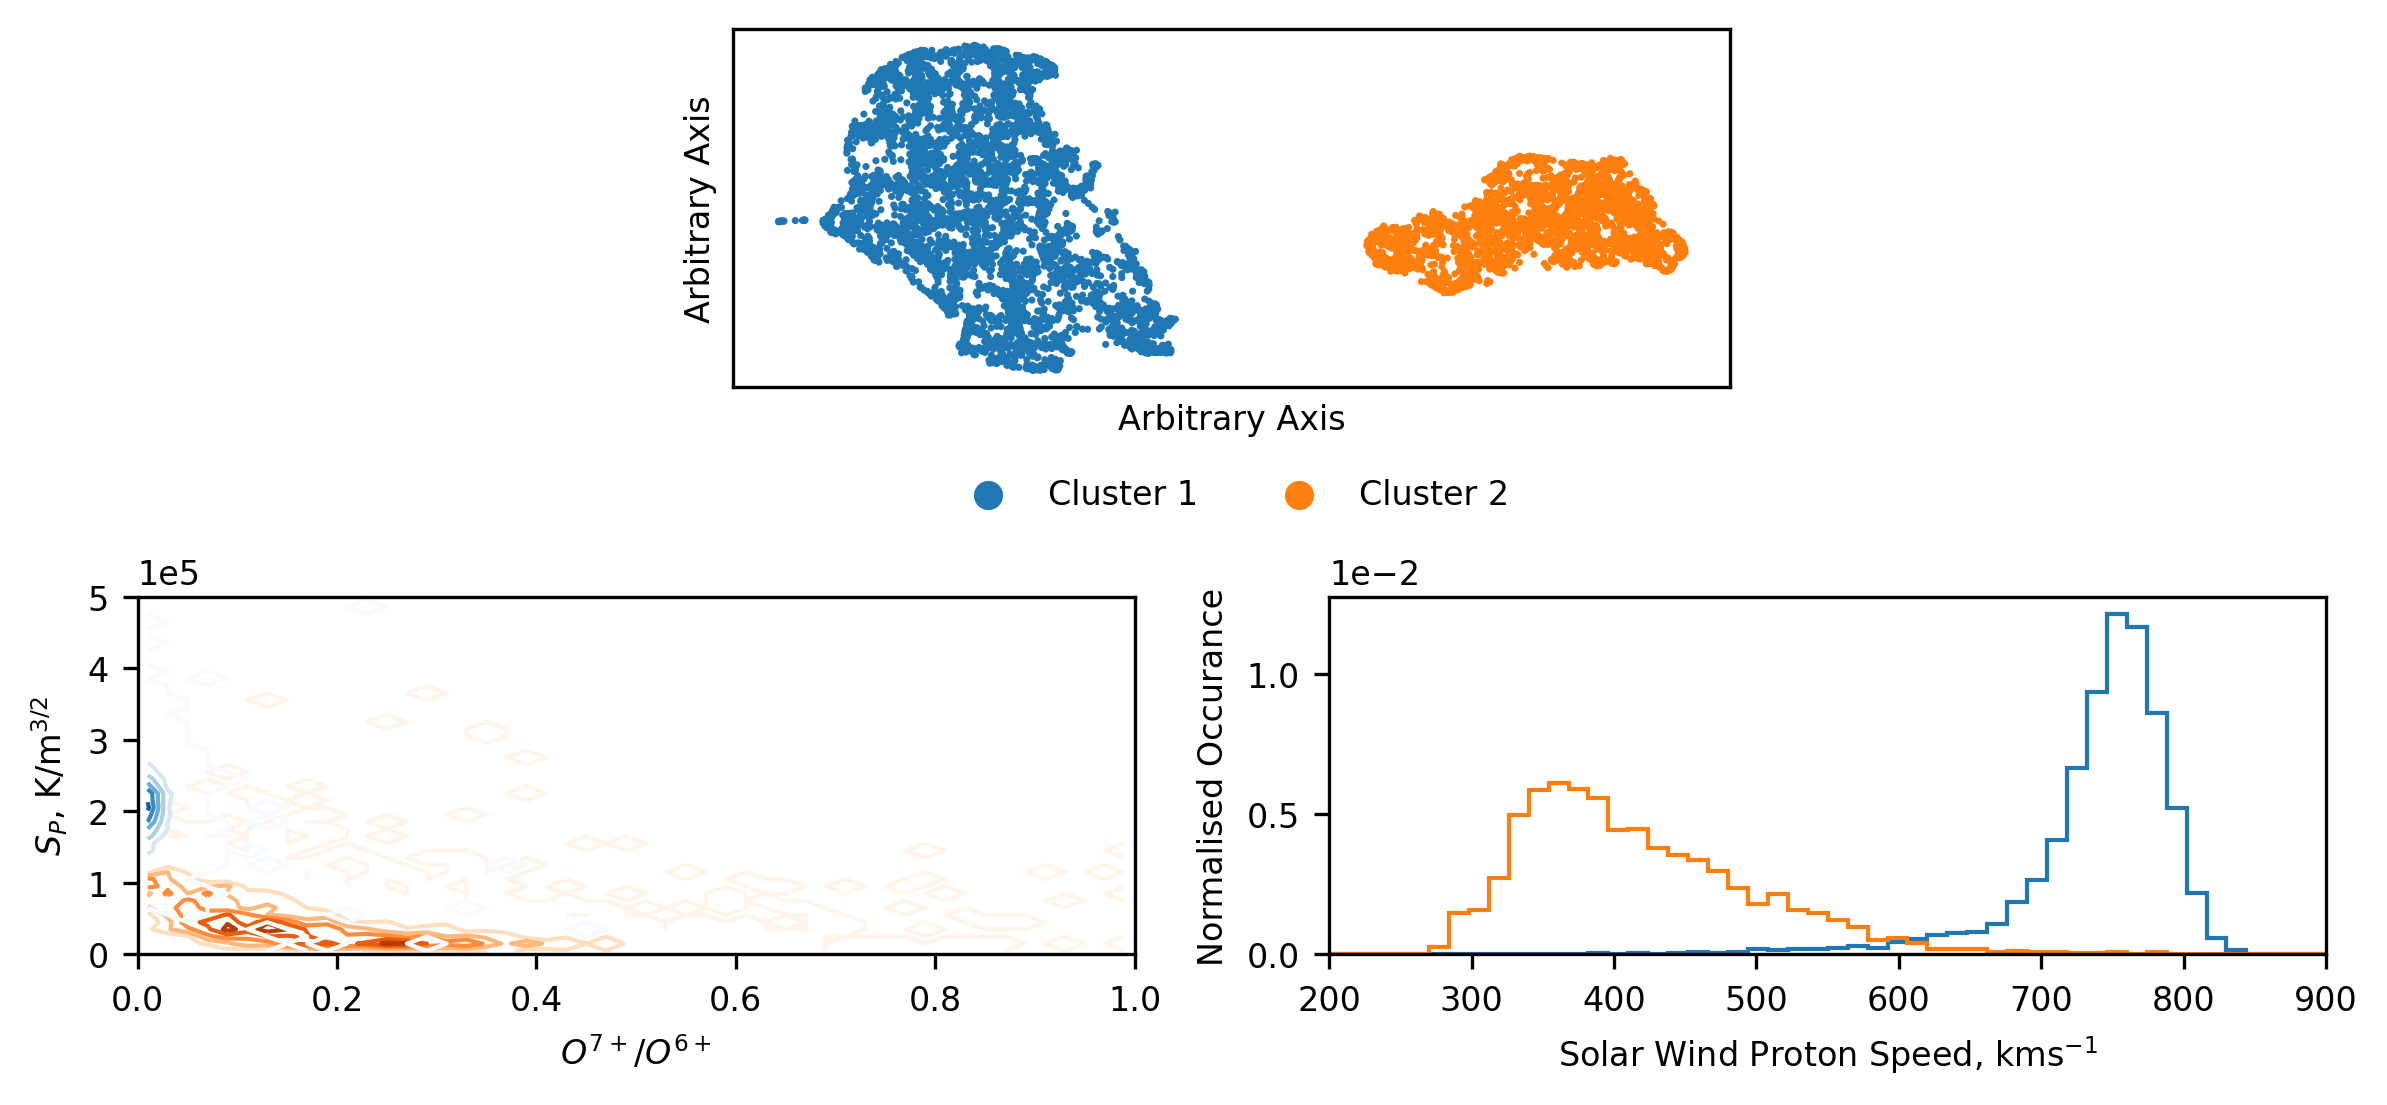

In [38]:
plt.figure(figsize=(8,9),dpi=300)
gs = gridspec.GridSpec(5, 8)
ax1 = plt.subplot(gs[0,2:6])
axs = [plt.subplot(gs[1,i:i+4]) for i in [0,4]]

# Scatter Plot
ax1.scatter(ls_r[:,0], ls_r[:,1],s=0.5,
            c=['C'+str(i) if i!=-1 else'k' for i in ls_c2])

ax1.scatter([],[],c='C0', label='Cluster 1')
ax1.scatter([],[],c='C1', label='Cluster 2')

# Contour Plots
z,x,y = np.histogram2d(lat_scans[ls_c2==1].o7_o6, lat_scans[ls_c2==1].Sp,
                       bins=50, range=[[0,1],[0,5e+5]])
x = [np.mean([i,j]) for i,j in zip(x[:-1],x[1:])]
y = [np.mean([i,j]) for i,j in zip(y[:-1],y[1:])]
axs[0].contour(x, y, z.T, levels=5, linewidths=1, cmap='Oranges')

z,x,y = np.histogram2d(lat_scans[ls_c2==0].o7_o6, lat_scans[ls_c2==0].Sp,
                       bins=50, range=[[0,1],[0,5e+5]])
x = [np.mean([i,j]) for i,j in zip(x[:-1],x[1:])]
y = [np.mean([i,j]) for i,j in zip(y[:-1],y[1:])]
axs[0].contour(x, y, z.T, levels=5, linewidths=1, cmap='Blues')

# Histograms
[axs[1].hist(lat_scans[ls_c2==i].Vp, bins=50, range=(200,900),
             density=True, histtype='step', color=j)
 for i,j in zip([0,1,-1],['C0','C1','k'])]

# Formatting
ax1.legend(frameon=False, loc='center', ncol=2,
           bbox_to_anchor=(0.5,-0.3))
[i.ticklabel_format(axis='y',style='sci',scilimits=(0,0)) for i in axs]
axs[0].set_ylim(0,5e+5)
axs[0].set_xlim(0,1)
axs[1].set_xlim(200,900)
axs[0].set_ylabel('$S_P$, K/m$^{3/2}$')
axs[0].set_xlabel('$O^{7+}$/$O^{6+}$')
axs[1].set_ylabel('Normalised Occurance')
axs[1].set_xlabel('Solar Wind Proton Speed, kms$^{-1}$')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_ylabel('Arbitrary Axis')
ax1.set_xlabel('Arbitrary Axis')
plt.tight_layout()
clear_output()
plt.show()

#### Classifying all of Ulysses' Data

As before, we extend our trained model to the full Ulysses dataset. First, we scale the data using the transform determined from the latitude scan data. Then, we dimension reduce the dataset into 2D through our trained UMAP mapping. And finally, we pass the reduced data through HDBSCAN's `approximate_predict` method, giving us cluster labels. This is approximate because the cluster labels correspond only to the training clusterer, rather than reflecting the labels found if the whole dataset where clustered together. Exactly as we would like it to work.

We can now see that an additional data cluster has been found. This data corresponds to 'noise' as determined by HDBSCAN. Due to this, the third cluster does not necessarily correspond to the third cluster found with the Bayesian Gaussian Mixture. Instead, it is more likely to be finding data that is only loosely linked to a given cluster (in the reduced space). Some of the following figures will highlight some of the differences.

In [39]:
uly_scaled = scaler.transform(ulydata6d[['o7_o6','Sp','c6_c5','q_fe','fe_o','he_h']])
uly_r = umap.transform(uly_scaled)

uly_umap_c,ls_prob = approximate_predict(hdbscan,uly_r)
set(uly_umap_c)

{-1, 0, 1}

In [40]:
uly_umap_c2 = order_class(uly_umap_c,ulydata6d.Vp)

Plotting the whole Ulysses data reduced and clustered presents us with the majority of the data in the same two clusters, but now with some data corresponding to a third cluster. This third cluster data is very sparse and, possibly as expected, appears to be noise.

Presenting the data in the familiar entropy versus oxygen charge state space, we can see that when transforming and classifying the whole Ulysses dataset there is an average increase in the proton specific-entropy, potentially hinting at some radial evolution (increasing) of the entropy (the inverse of this has also been seen in previous plots, where the ACE data typically has lower entropy). We also see that the cluster 3 data, limited as it is, is loosely constrained to the regions where the Cluster 1 and 2 overlap, hinting at this data being less than just noise.

Plotting the relative error of the traditional speed thresholding method, we see that the results are qualitatively the same as when we investigated the classification using the Bayesian Gausian Mixture.

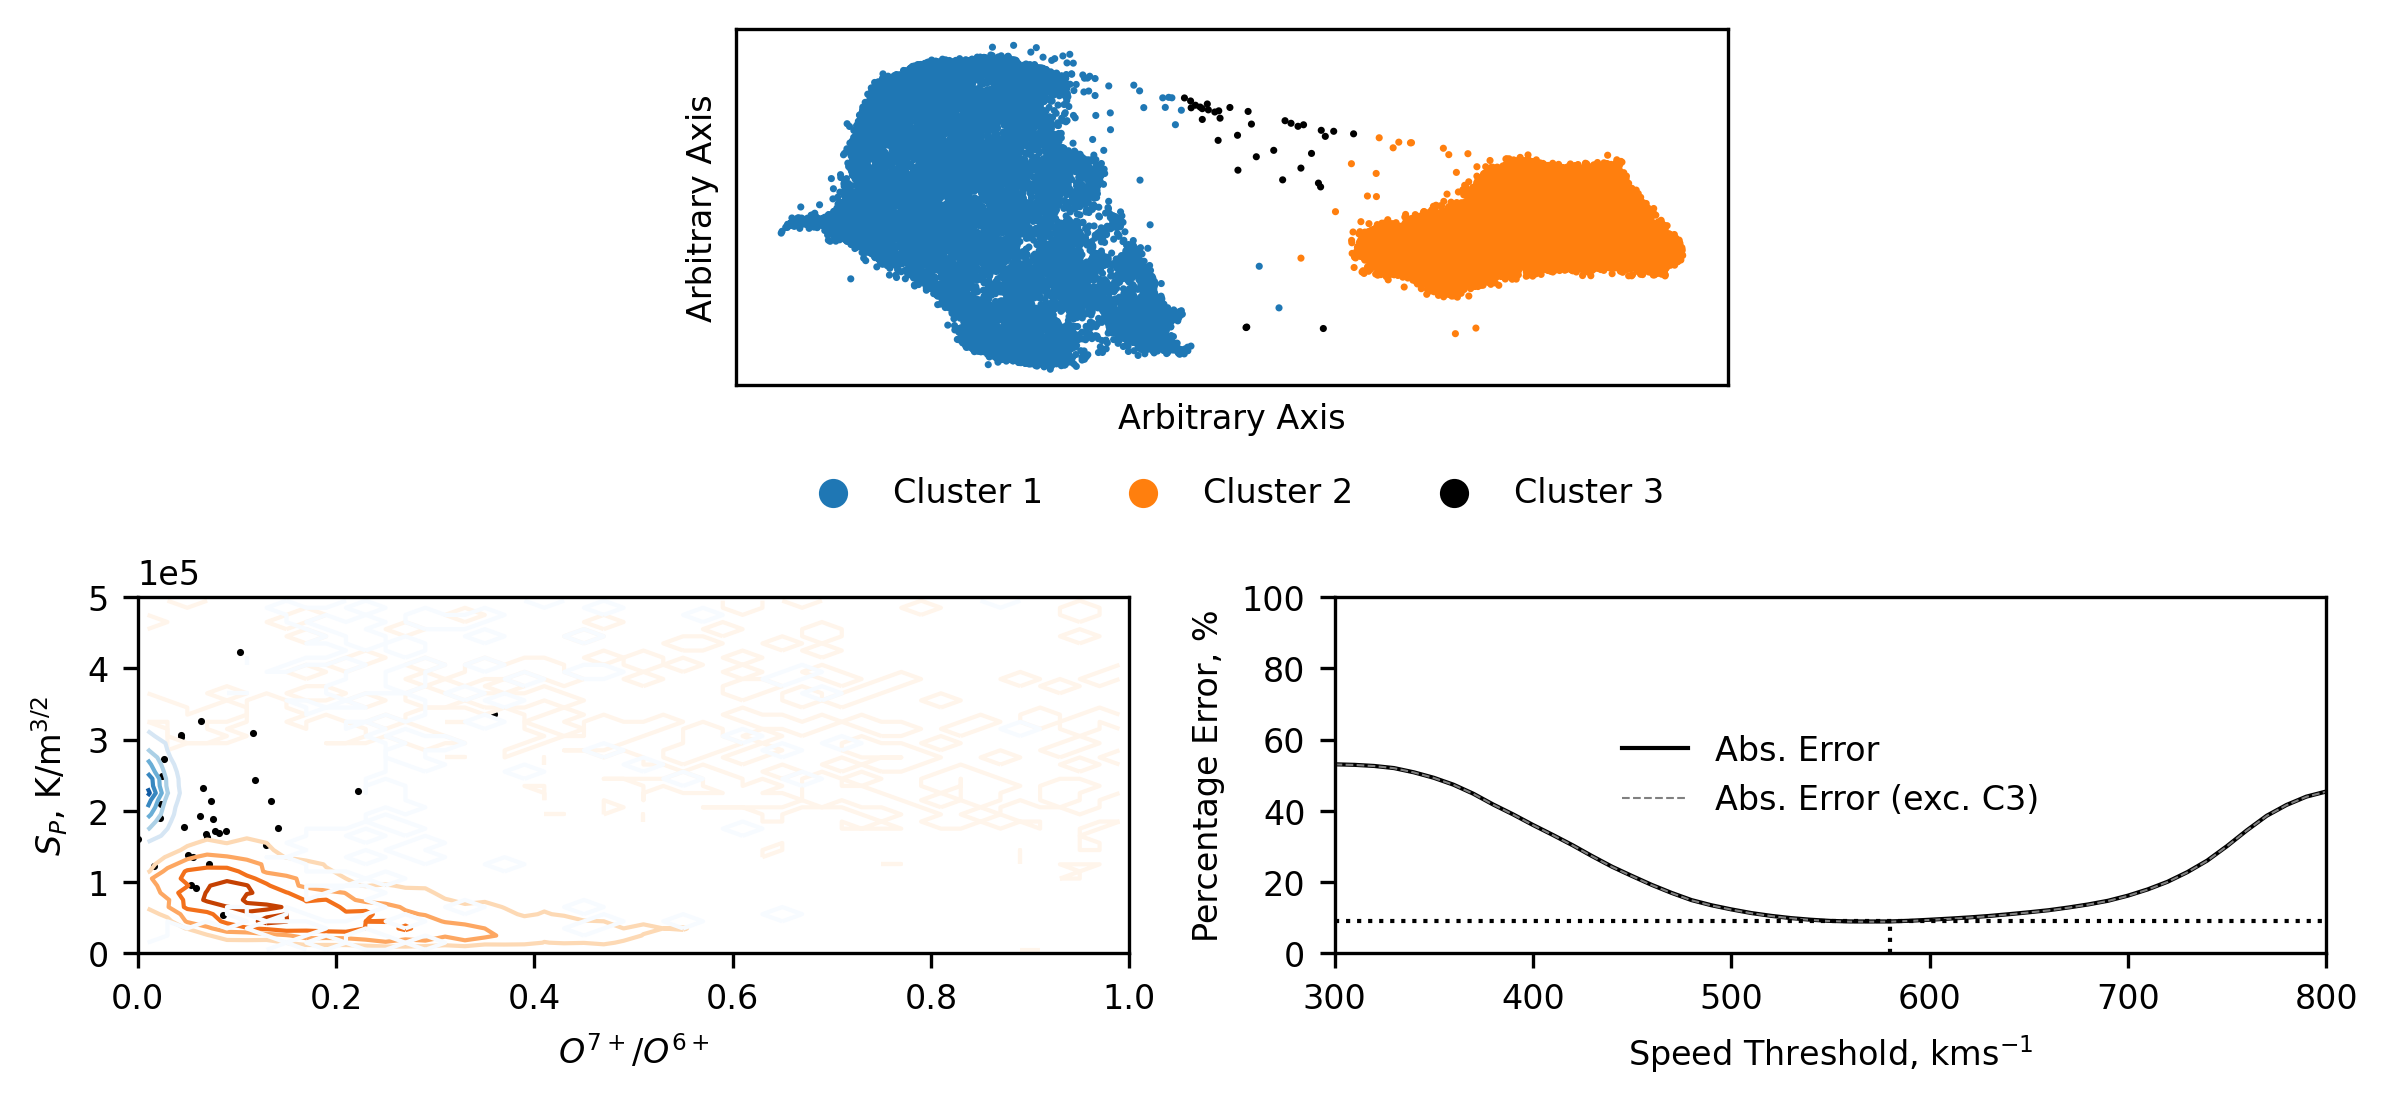

In [41]:
plt.figure(figsize=(8,9),dpi=300)
gs = gridspec.GridSpec(5, 8)
ax1 = plt.subplot(gs[0,2:6])
axs = [plt.subplot(gs[1,i:i+4]) for i in [0,4]]

# Scatter Plot
ax1.scatter(uly_r[:,0], uly_r[:,1],s=0.5,
            c=['C'+str(i) if i!=-1 else'k' for i in uly_umap_c2])

ax1.scatter([],[],c='C0', label='Cluster 1')
ax1.scatter([],[],c='C1', label='Cluster 2')
ax1.scatter([],[],c='k', label='Cluster 3')

# Contour Plots
z,x,y = np.histogram2d(ulydata6d[uly_umap_c2==1].o7_o6, ulydata6d[uly_umap_c2==1].Sp,
                       bins=50, range=[[0,1],[0,5e+5]])
x = [np.mean([i,j]) for i,j in zip(x[:-1],x[1:])]
y = [np.mean([i,j]) for i,j in zip(y[:-1],y[1:])]
axs[0].contour(x, y, z.T, levels=5, linewidths=1, cmap='Oranges')

z,x,y = np.histogram2d(ulydata6d[uly_umap_c2==0].o7_o6, ulydata6d[uly_umap_c2==0].Sp,
                       bins=50, range=[[0,1],[0,5e+5]])
x = [np.mean([i,j]) for i,j in zip(x[:-1],x[1:])]
y = [np.mean([i,j]) for i,j in zip(y[:-1],y[1:])]
axs[0].contour(x, y, z.T, levels=5, linewidths=1, cmap='Blues')

axs[0].scatter(ulydata6d[uly_umap_c2==-1].o7_o6,
               ulydata6d[uly_umap_c2==-1].Sp, s=0.5,c='k')

# Classification Error
cl_err = [class_error(uly_umap_c2, [0 if v > i else 1 for v in ulydata6d.Vp])
           for i in range(300,810,10)]
cl_err_u = [class_error(uly_umap_c2[uly_umap_c2!=-1],
                        [0 if v > i else 1 for v in ulydata6d.Vp[uly_umap_c2!=-1]])
           for i in range(300,810,10)]

axs[1].plot(np.arange(300,810,10),cl_err,c='k',
            linewidth=1,label='Abs. Error')
axs[1].plot(np.arange(300,810,10),cl_err_u,c='grey',alpha=1,
            linewidth=0.5,linestyle='--',label='Abs. Error (exc. C3)')

axs[1].plot([300,800],[np.min(cl_err),np.min(cl_err)],
            linewidth=1,linestyle=':',c='k')
axs[1].plot([300+(np.argmin(cl_err)+1)*10,300+(np.argmin(cl_err)+1)*10],
            [0,np.min(cl_err)],
            linewidth=1,linestyle=':',c='k')

# Formatting
ax1.legend(frameon=False, loc='center', ncol=3,
           bbox_to_anchor=(0.5,-0.3))
axs[0].ticklabel_format(axis='y',style='sci',scilimits=(0,0))
axs[0].set_ylim(0,5e+5)
axs[0].set_xlim(0,1)
axs[1].set_ylim(0,100)
axs[1].set_xlim(300,800)
axs[0].set_ylabel('$S_P$, K/m$^{3/2}$')
axs[0].set_xlabel('$O^{7+}$/$O^{6+}$')
axs[1].set_ylabel('Percentage Error, %')
axs[1].set_xlabel('Speed Threshold, kms$^{-1}$')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_ylabel('Arbitrary Axis')
ax1.set_xlabel('Arbitrary Axis')
plt.tight_layout()

axs[1].legend(loc='center',frameon=False)
plt.tight_layout()
plt.show()

An interesting feature we observe in the reduced dimensional space is that cluster 2 is much more compact that cluster 1. In general, coronal hole wind is associated with being homogenous, while streamer belt wind comprises a broader range of solar wind configurations. Our results suggest that an inverse pattern has been found in the data - evidenced by the broadness of the clusters. The reductions produced by UMAP are difficult to conclusively comment on, except where data appears to be clustered. However, through various iterations of clustering, similar spreads in the data were found, and so we maintain that in our chosen parameter space, the Ulysses coronal hole wind data appears to correspond to a more diverse topological region.

#### Classifying all of ACE's Data

We process the ACE data in the same way as the Ulysses data in the following few lines of code.

In [42]:
acedata6d = acedata.dropna(subset=['o7_o6','Sp','c6_c5','q_fe','fe_o','he_h'])

In [43]:
ace_scaled = scaler.transform(acedata6d[['o7_o6','Sp','c6_c5','q_fe','fe_o','he_h']])
ace_r = umap.transform(ace_scaled)

ace_umap_c,ls_prob = approximate_predict(hdbscan,ace_r)
set(ace_umap_c)

{-1, 0, 1}

In [44]:
ace_umap_c2 = order_class(ace_umap_c,acedata6d.Vp)

As with the BGM scheme, when we look at how the data is distributed between the clusters, we see a significant drop in the amount of coronal hole wind (as expected). We also see that the streamer belt wind does not increase in it's spread with the dearth of data, but instead it is still all characterised in the same localised region of the plotting domain. When we represent the results in the entropy/charge state domain, we see the same general decrease in entropy that we saw in the results of the Bayesian Gaussian Mixture. Though, with those results in mind, we can see that the coronal hole wind (cluster 1) is captured much more appropriately than with the other scheme. The relative errors are also qualitatively similar, as one might expect when both models capture the same underlying physics (to an extent).

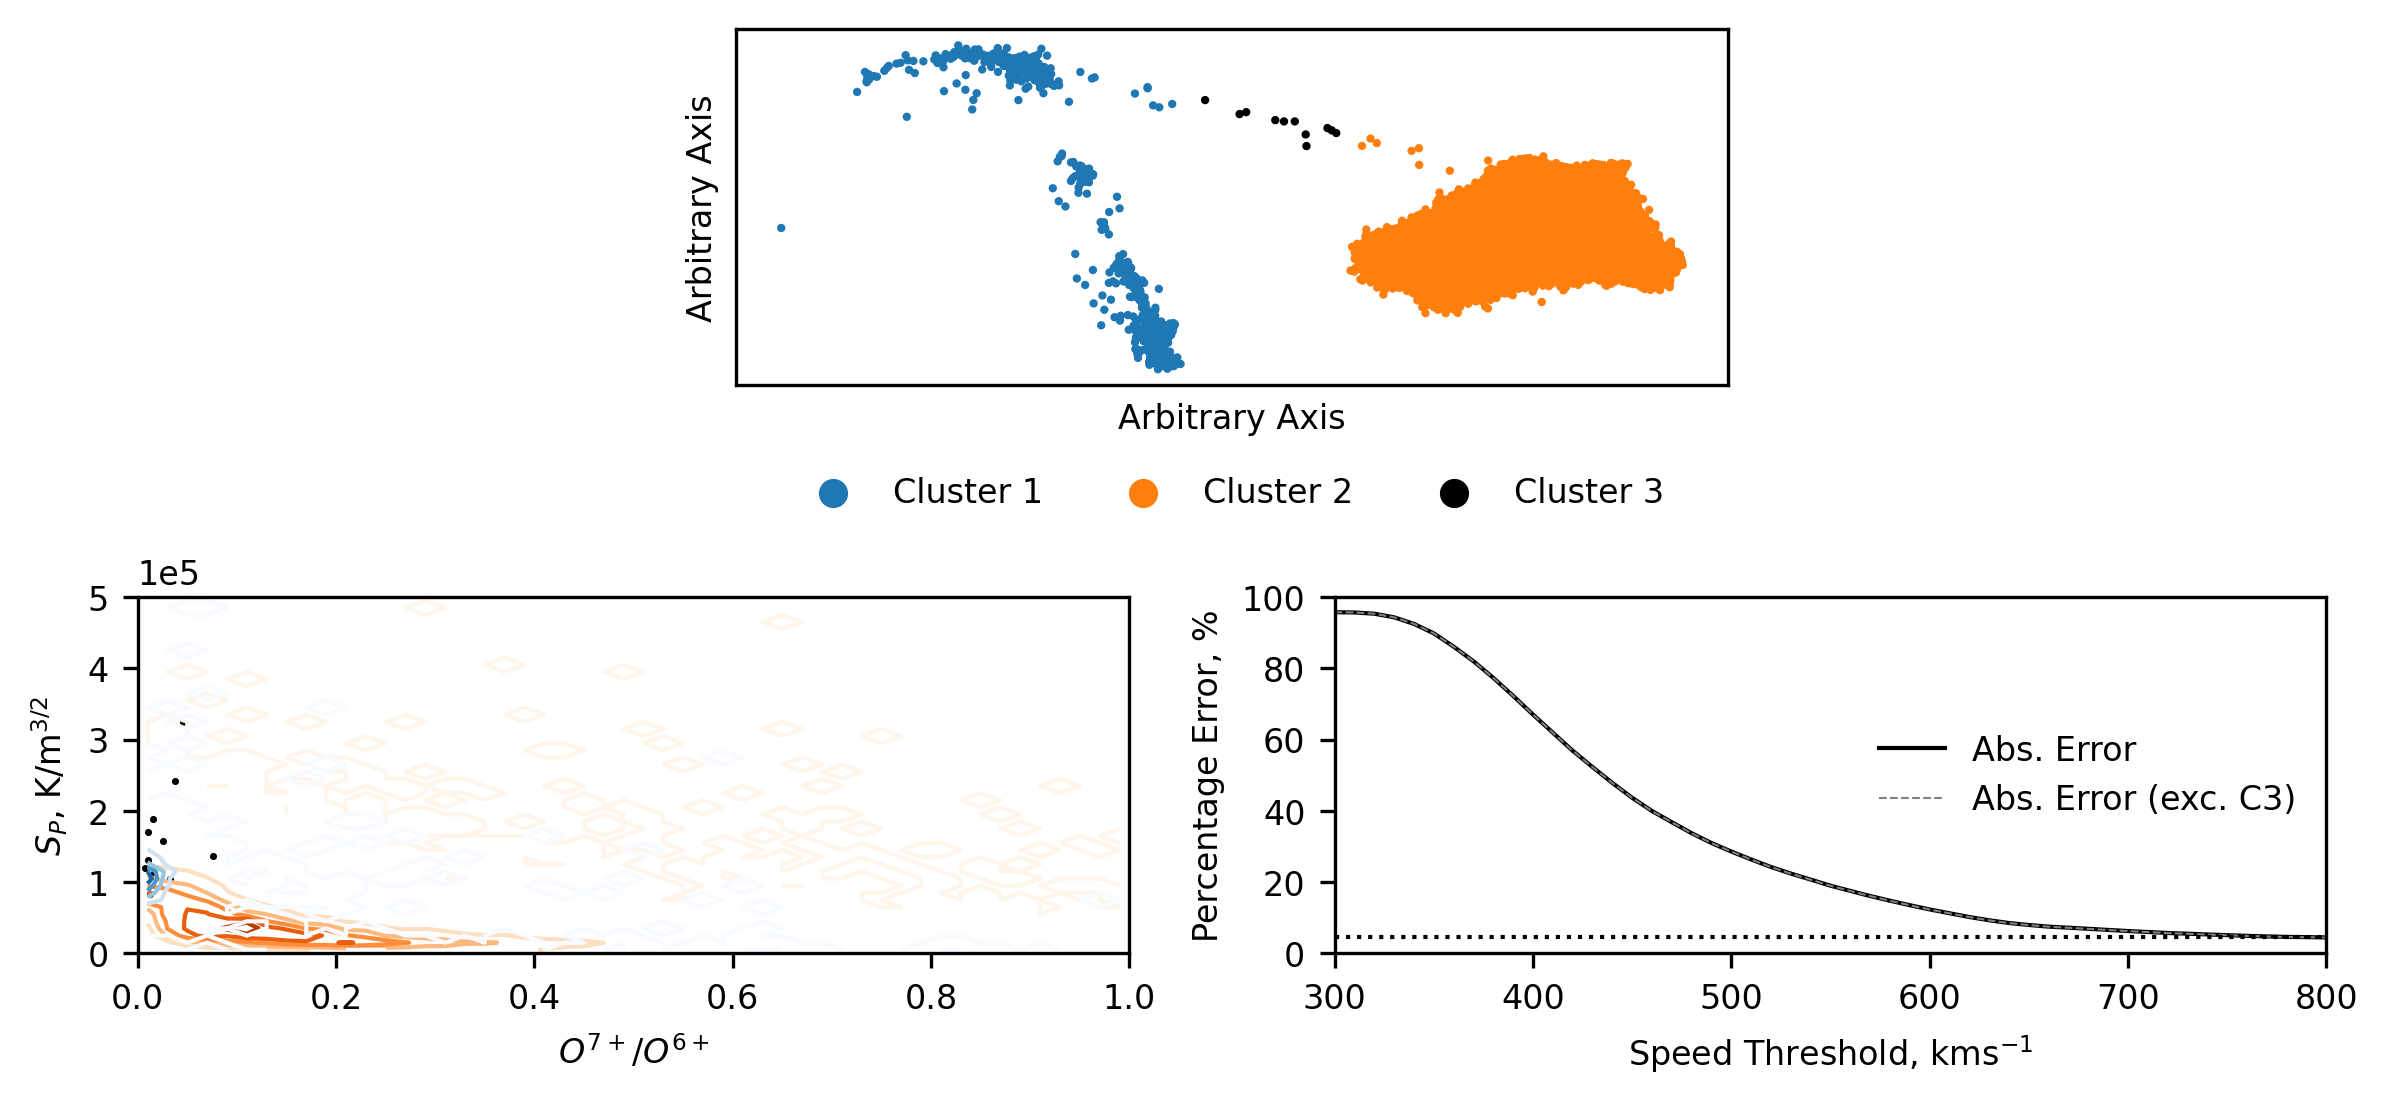

In [45]:
plt.figure(figsize=(8,9),dpi=300)
gs = gridspec.GridSpec(5, 8)
ax1 = plt.subplot(gs[0,2:6])
axs = [plt.subplot(gs[1,i:i+4]) for i in [0,4]]

# Scatter Plot
ax1.scatter(ace_r[:,0], ace_r[:,1],s=1,
            c=['C'+str(i) if i!=-1 else'k' for i in ace_umap_c2])

ax1.scatter([],[],c='C0', label='Cluster 1')
ax1.scatter([],[],c='C1', label='Cluster 2')
ax1.scatter([],[],c='k', label='Cluster 3')


# Contour Plots
z,x,y = np.histogram2d(acedata6d[ace_umap_c2==1].o7_o6, acedata6d[ace_umap_c2==1].Sp,
                       bins=50, range=[[0,1],[0,5e+5]])
x = [np.mean([i,j]) for i,j in zip(x[:-1],x[1:])]
y = [np.mean([i,j]) for i,j in zip(y[:-1],y[1:])]
axs[0].contour(x, y, z.T, levels=5, linewidths=1, cmap='Oranges')

z,x,y = np.histogram2d(acedata6d[ace_umap_c2==0].o7_o6, acedata6d[ace_umap_c2==0].Sp,
                       bins=50, range=[[0,1],[0,5e+5]])
x = [np.mean([i,j]) for i,j in zip(x[:-1],x[1:])]
y = [np.mean([i,j]) for i,j in zip(y[:-1],y[1:])]
axs[0].contour(x, y, z.T, levels=5, linewidths=1, cmap='Blues')

axs[0].scatter(acedata6d[ace_umap_c2==-1].o7_o6,
               acedata6d[ace_umap_c2==-1].Sp, s=0.5,c='k')

# Classification Error
cl_err = [class_error(ace_umap_c2, [0 if v > i else 1 for v in acedata6d.Vp])
           for i in range(300,810,10)]
cl_err_u = [class_error(ace_umap_c2[ace_umap_c2!=-1],
                        [0 if v > i else 1 for v in acedata6d.Vp[ace_umap_c2!=-1]])
           for i in range(300,810,10)]

axs[1].plot(np.arange(300,810,10),cl_err,c='k',
            linewidth=1,label='Abs. Error')
axs[1].plot(np.arange(300,810,10),cl_err_u,c='grey',alpha=1,
            linewidth=0.5,linestyle='--',label='Abs. Error (exc. C3)')

axs[1].plot([300,800],[np.min(cl_err),np.min(cl_err)],
            linewidth=1,linestyle=':',c='k')
axs[1].plot([300+(np.argmin(cl_err)+1)*10,300+(np.argmin(cl_err)+1)*10],
            [0,np.min(cl_err)],
            linewidth=1,linestyle=':',c='k')

# Formatting
ax1.legend(frameon=False, loc='center', ncol=3,
           bbox_to_anchor=(0.5,-0.3))
axs[0].ticklabel_format(axis='y',style='sci',scilimits=(0,0))
axs[0].set_ylim(0,5e+5)
axs[0].set_xlim(0,1)
axs[1].set_ylim(0,100)
axs[1].set_xlim(300,800)
axs[0].set_ylabel('$S_P$, K/m$^{3/2}$')
axs[0].set_xlabel('$O^{7+}$/$O^{6+}$')
axs[1].set_ylabel('Percentage Error, %')
axs[1].set_xlabel('Speed Threshold, kms$^{-1}$')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_ylabel('Arbitrary Axis')
ax1.set_xlabel('Arbitrary Axis')
plt.tight_layout()
axs[1].legend(loc='right',frameon=False)

plt.tight_layout()
plt.show()

#### Comparing the Inter-Spacecraft and Intra-Cluster Proton Speed distributions

When we make comparisons between the two spacecraft we see many of the same features: the streamer belt wind (clusters 2) match up well, with ACE's cluster 2 showing the expectedly heavier tail; ACE's coronal hole wind (cluster 1) appears to have been equivalently reduced in speed, to the point of introducing some discrepancies in there being streamer belt wind faster than coronal hole wind; Ulysses coronal hole wind has a secondary bump (as before this data is also from the ecliptic plane, but these results aren't plotted for brevity).

Seeing the same features between two methods which are incredibly different serves to validate many of the bulk features observed in both, since they have been identified independently.

As mentioned before, some of these results do not agree with those found in [Bloch et al. (2020)](https://link.springer.com/article/10.1007/s11207-020-01609-z). These differences are predominantly related to cluster 3, though there are also some differnces in the other clusters too. After some investigation, we conclude that these differences are predominantly down to there being slightly different data in the two datasets, suggesting some sensitivity of the methods to the limited amount of data used in training. The overall results remain qualitatively the same though. We explore this sensitivity in the following section.

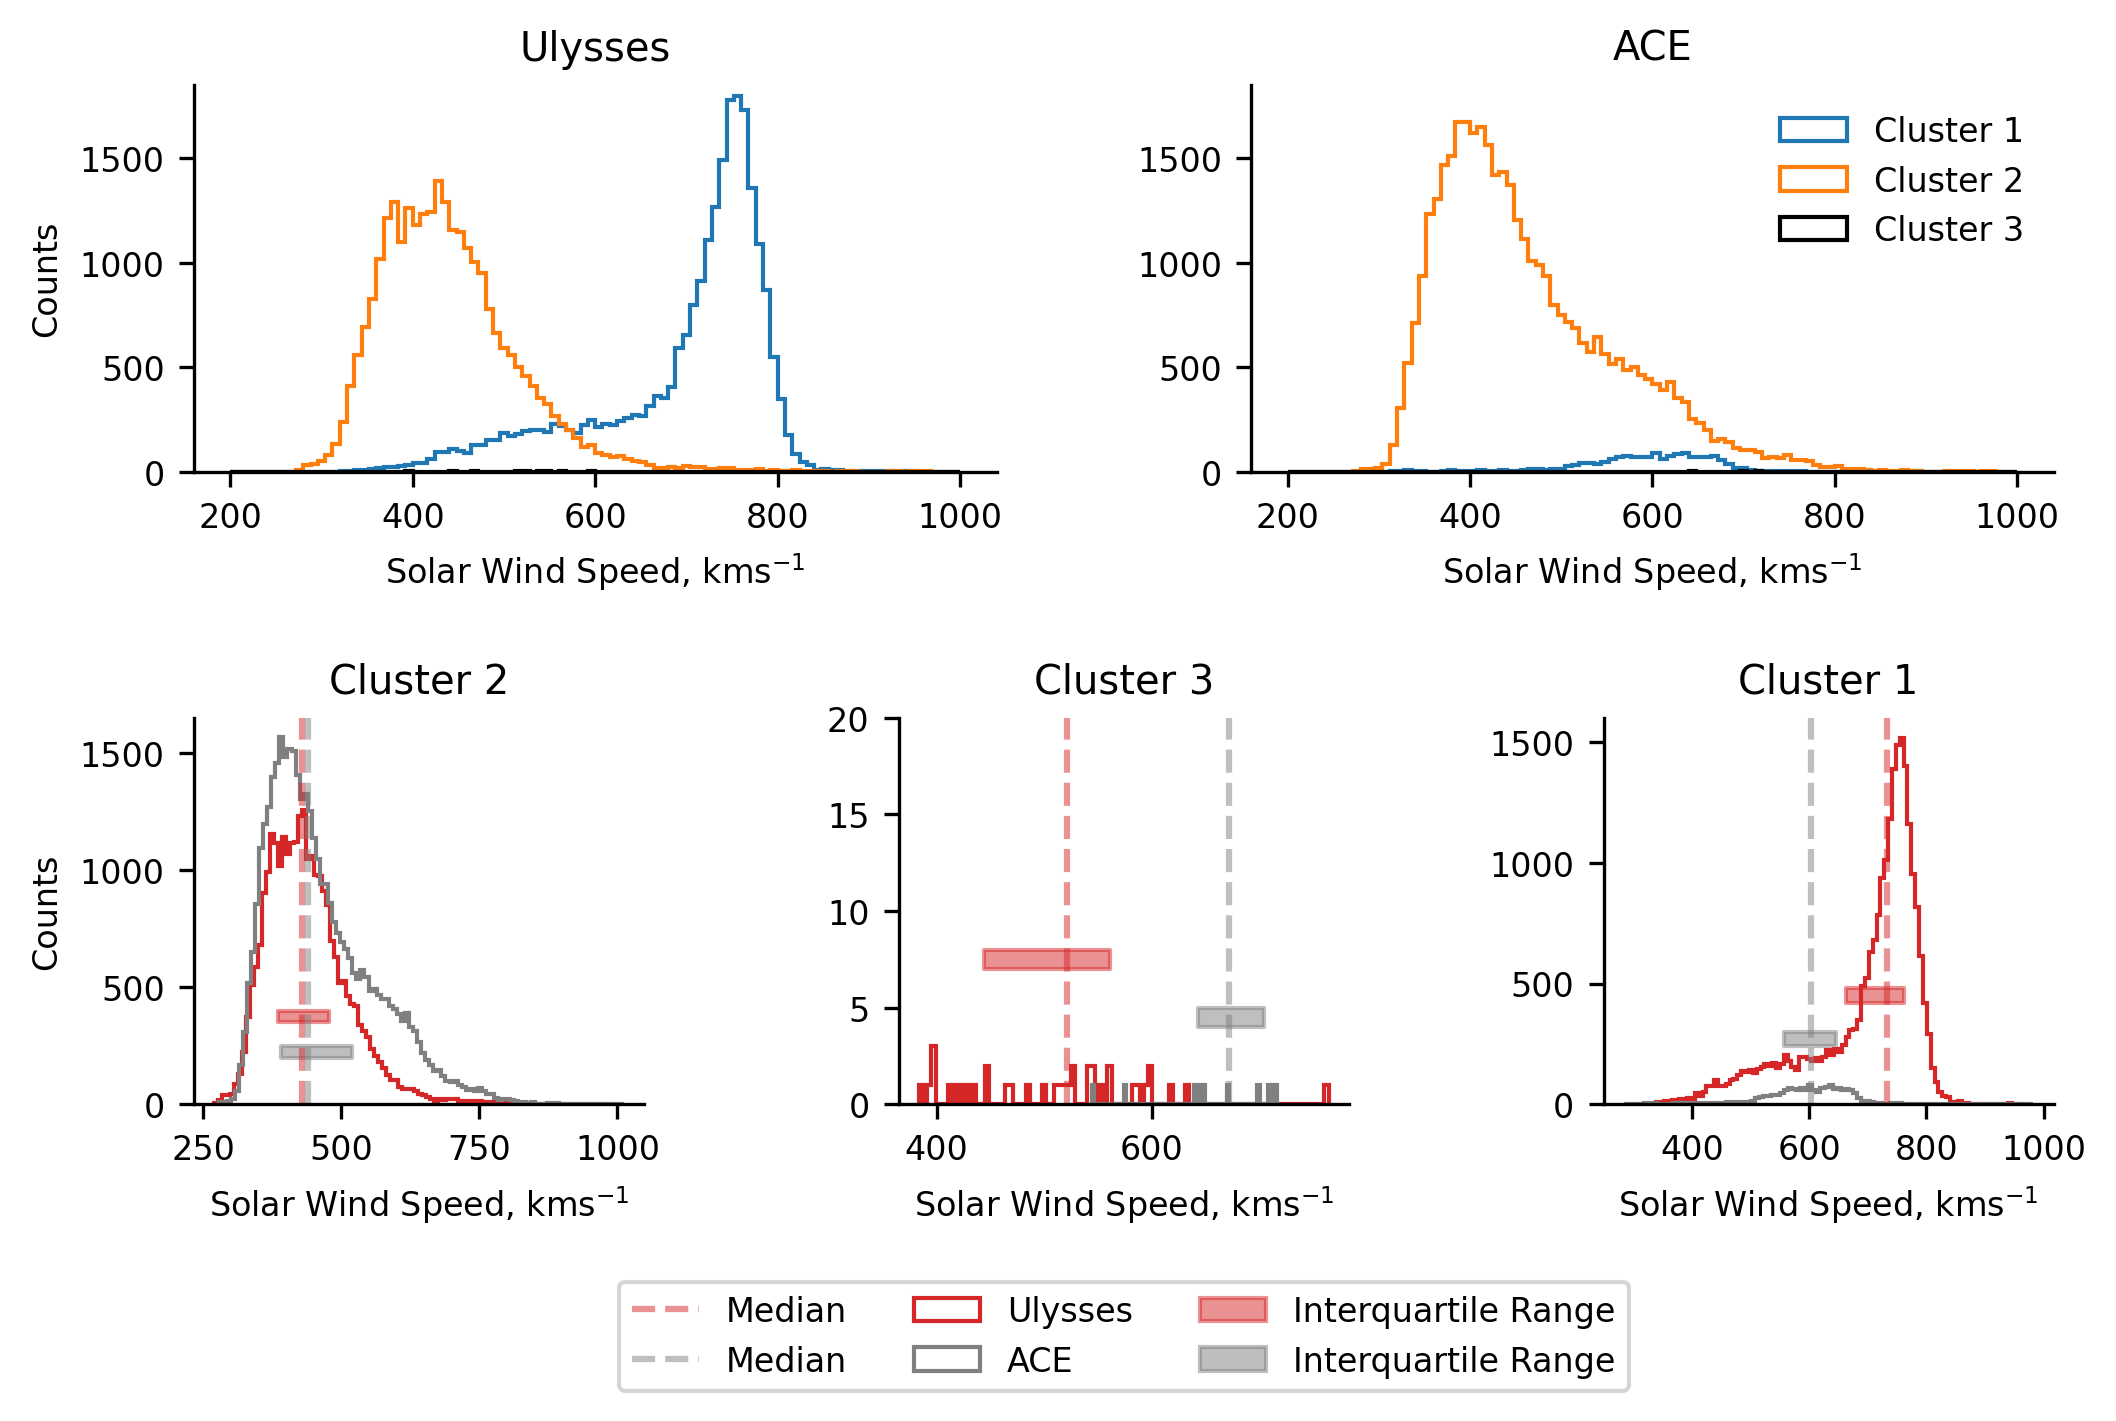

In [46]:
plt.figure(figsize=(8,4.5),dpi=300)
gs = gridspec.GridSpec(5,16)

axs1 = [plt.subplot(gs[0:2,i:i+7]) for i in [0,9]]
axs2 = [plt.subplot(gs[3:,i:i+4]) for i in [0,6,12]]

[i.hist(j[k == l].Vp, bins=100, histtype='step',
        range=(200,1000),color=m,label=n)
 for i,j,k in zip(axs1,[ulydata6d,acedata6d],[uly_umap_c,ace_umap_c])
 for l,m,n in zip([0,1,-1], ['C0','C1','k'],
                  ['Cluster 1','Cluster 2','Cluster 3'])]

#######

# These complicated list comprehensions work essentially like this:
# [make plot
#  for i,j in axis/classification
#  for j,k in spacecraft/colours]

[i.hist(j[k == l], bins=100, histtype='step', color=m, label=n)
 for i,l in zip(axs2,[1,-1,0])
 for j,k,m,n in zip([ulydata6d.Vp,acedata6d.Vp],[uly_umap_c,ace_umap_c],
                  ['tab:red','gray'],['Ulysses','ACE'])]

medians = [[i[j==k].median()
            for i,j in zip([ulydata6d.Vp,acedata6d.Vp],
                           [uly_umap_c,ace_umap_c])]
           for k in [1,-1,0]]

[i.plot([j[k],j[k]],[0,2000], color=l, label='Median',
        linestyle='--',alpha=0.5)
 for i,j in zip(axs2,medians)
 for k,l in zip([0,1],['tab:red','gray'])]

quartiles = [[[i[j==k].quantile(0.25),i[j==k].quantile(0.75)]
              for i,j in zip([ulydata6d.Vp,acedata6d.Vp],
                           [uly_umap_c,ace_umap_c])]
             for k in [1,-1,0]]

[i.fill_between(x=[j[k][0],j[k][1]], y1=[l*(0.3+m),l*(0.3+m)],
                y2=[l*(0.3+2*m),l*(0.3+2*m)],color=n,alpha=0.5,
                label='Interquartile Range')
 for i,j,l in zip(axs2,quartiles,[1000,20,1200])
 for k,m,n in zip([0,1],[0.05,-0.05],['tab:red','gray'])]

# Formatting
[i.set_ylim(0,1850) for i in axs1]
[i.set_ylim(0,j) for i,j in zip(axs2,[1650,20,1600])]
[i.set_xlabel('Solar Wind Speed, kms$^{-1}$') for i in axs1+axs2]
[i.set_ylabel('Counts') for i in [axs1[0],axs2[0]]]
[i.set_title(j) for i,j in zip(axs1+axs2,['Ulysses','ACE','Cluster 2',
                                          'Cluster 3', 'Cluster 1'])]
axs1[1].legend(loc='upper right',frameon=False)
axs2[1].legend(bbox_to_anchor=(0.5,-0.6),loc='center',ncol=3)
sns.despine()
clear_output()
plt.show()

#### Sub-sample Ensemble Results

As mentioned above, by using a slightly different set of training data we have obtained results which are slightly different to those published in [Bloch et al. (2020)](https://link.springer.com/article/10.1007/s11207-020-01609-z). To get a better idea of which structures are consistently present in the data we repeat the reduction and clustering procedure using 80% subsamples of the data (with replacement) and save the results. Due to the computational cost of this procedure we only run the ensemble 120 time. The following code demonstrates the procedure.



In [47]:
# Check if enemble files exist, else run code to generate.
if len(glob.glob('ensemble_results_1r.csv')) == 0:
    try:
        url = 'https://github.com/tbloch1/solar_wind_classification/releases/download/v0.1/ensemble_results_1r.csv'
        req = requests.get(url)
        with open('ensemble_results_1r.csv', 'wb') as f:
            f.write(req.content)
        all_res_rot = pd.read_csv('ensemble_results_1r.csv')
        
    except:
        print('Could not find file to download, so reprocessing the results.')
        ensem_df = []
        for i in range(120):
            # Sample and process latitude scan data
            ls = lat_scans.sample(frac=0.8,replace=True)
            scaler = MMS().fit(ls[['o7_o6','Sp','c6_c5','q_fe','fe_o','he_h']])

            ls_scaled = scaler.transform(ls[['o7_o6','Sp','c6_c5','q_fe','fe_o','he_h']])

            # Dimension reduce and cluster
            umap = UMAP(n_neighbors=40, metric='correlation',
                        min_dist=0, spread=0.5, random_state=1,
                        transform_seed=1).fit(ls_scaled)
            ls_r = umap.transform(ls_scaled)

            hdbscan = HDBSCAN(min_cluster_size=2000, min_samples=1400,
                            prediction_data=True).fit(ls_r)

            ls_c = hdbscan.labels_
            ls_c2 = order_class(ls_c,ls.Vp)

            # Add 2D coordinates and classifications to dataframe
            ls['umapx'] = ls_r[:,0]
            ls['umapy'] = ls_r[:,1]
            ls['labels'] = ls_c2
            ensem_df.append(ls)

        # Concatenate and save
        all_res = pd.concat(ensem_df)
        all_res.to_csv('ensemble_results_all.csv')

        # Subselect all reductions with same orientation
        # and save only those
        all_res_rot = pd.concat([i for i in ensem_df
                            if i[i.labels==0].umapx.mean() < 6])
        all_res_rot.to_csv('ensemble_results_1r.csv')
else:
    # Read saved files
    all_res_rot = pd.read_csv('ensemble_results_1r.csv')

One difficulty with using UMAP in this way is that the algorithm is invariant to rotations and the scaling depends on the data. In practice, this typically manifests in the dimension reduction orientation being rotated 180$^{\circ}$, with slight variations in the x- and y-coordinates.

Since we are dealing with data samples which are taken from the same dataset, we take the coordinate variations to be negligible. For the rotations, we are forced to downselect from our ensemble results, taking only those with the same orientation. It would be significantly more complicated to try to identify a possibly-changing rotation centre and transform all the data. This leaves us with ~60 ensemble member results.

The first thing we would like to understand is how this data is distributed in the reduction space. To do so, we plot the point density in the reduced space. From this, we can see two prominent data groupings, with some substructure.

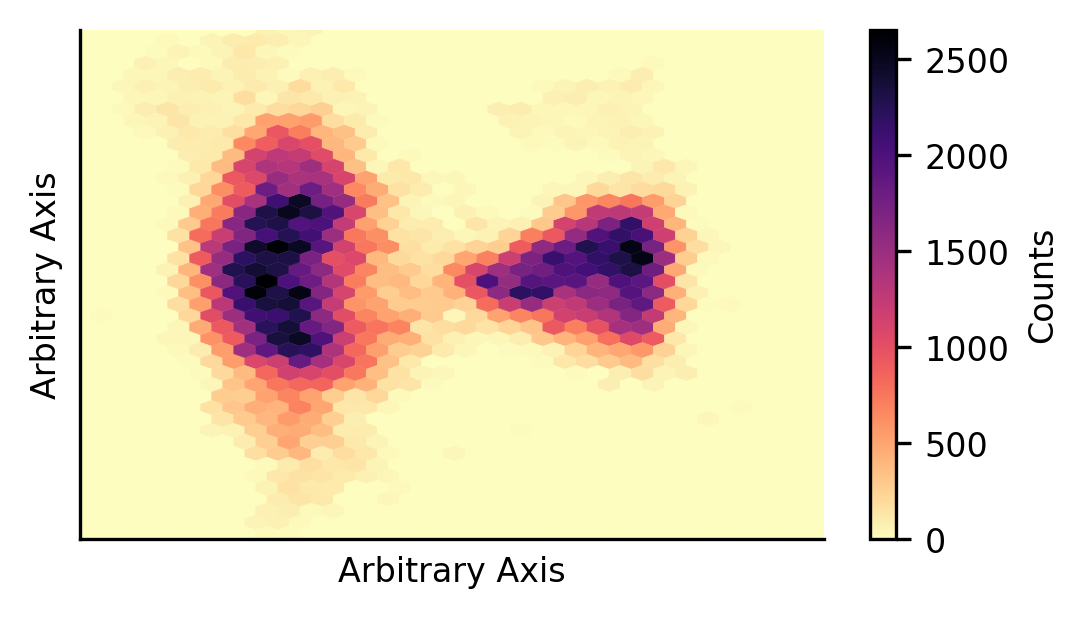

In [48]:
fig = plt.figure(figsize=(4,2.25),dpi=300)
plt.hexbin(all_res_rot.umapx,all_res_rot.umapy,gridsize=40,
           cmap='magma_r',linewidth=0.1)

plt.colorbar(label='Counts')
[getattr(plt,i)(j) for i,j in zip(['xlim','ylim'],[[-5,15],[-2,12]])]
[getattr(plt,i)([]) for i in ['xticks','yticks']]
[getattr(plt,i)('Arbitrary Axis') for i in ['xlabel','ylabel']]
sns.despine()
plt.show()

We would also like to understand how the clusters are distributed in the reduction space. To do so, we plot contour maps for each cluster to show how the data is distributed.

We observe that the cluster 1 and 2 obtained during the initial training of the classification scheme are represented in much the same way through the ensemble results. There is an important difference now though - cluster 3 has a well defined location. This is in contrast to the initial training (and what we might have expected from the above density plot), where no cluster 3 was found, but in agreement with the results presented in [Bloch et al. (2020)](https://link.springer.com/article/10.1007/s11207-020-01609-z).

There is overlap between clusters 2 and 3 in the ensemble results, likely suggesting that various members of the ensemble classified much of the cluster 3 data as cluster 2. Potentially explaining why this third cluster was not initially identified in the results presented in this notebook.

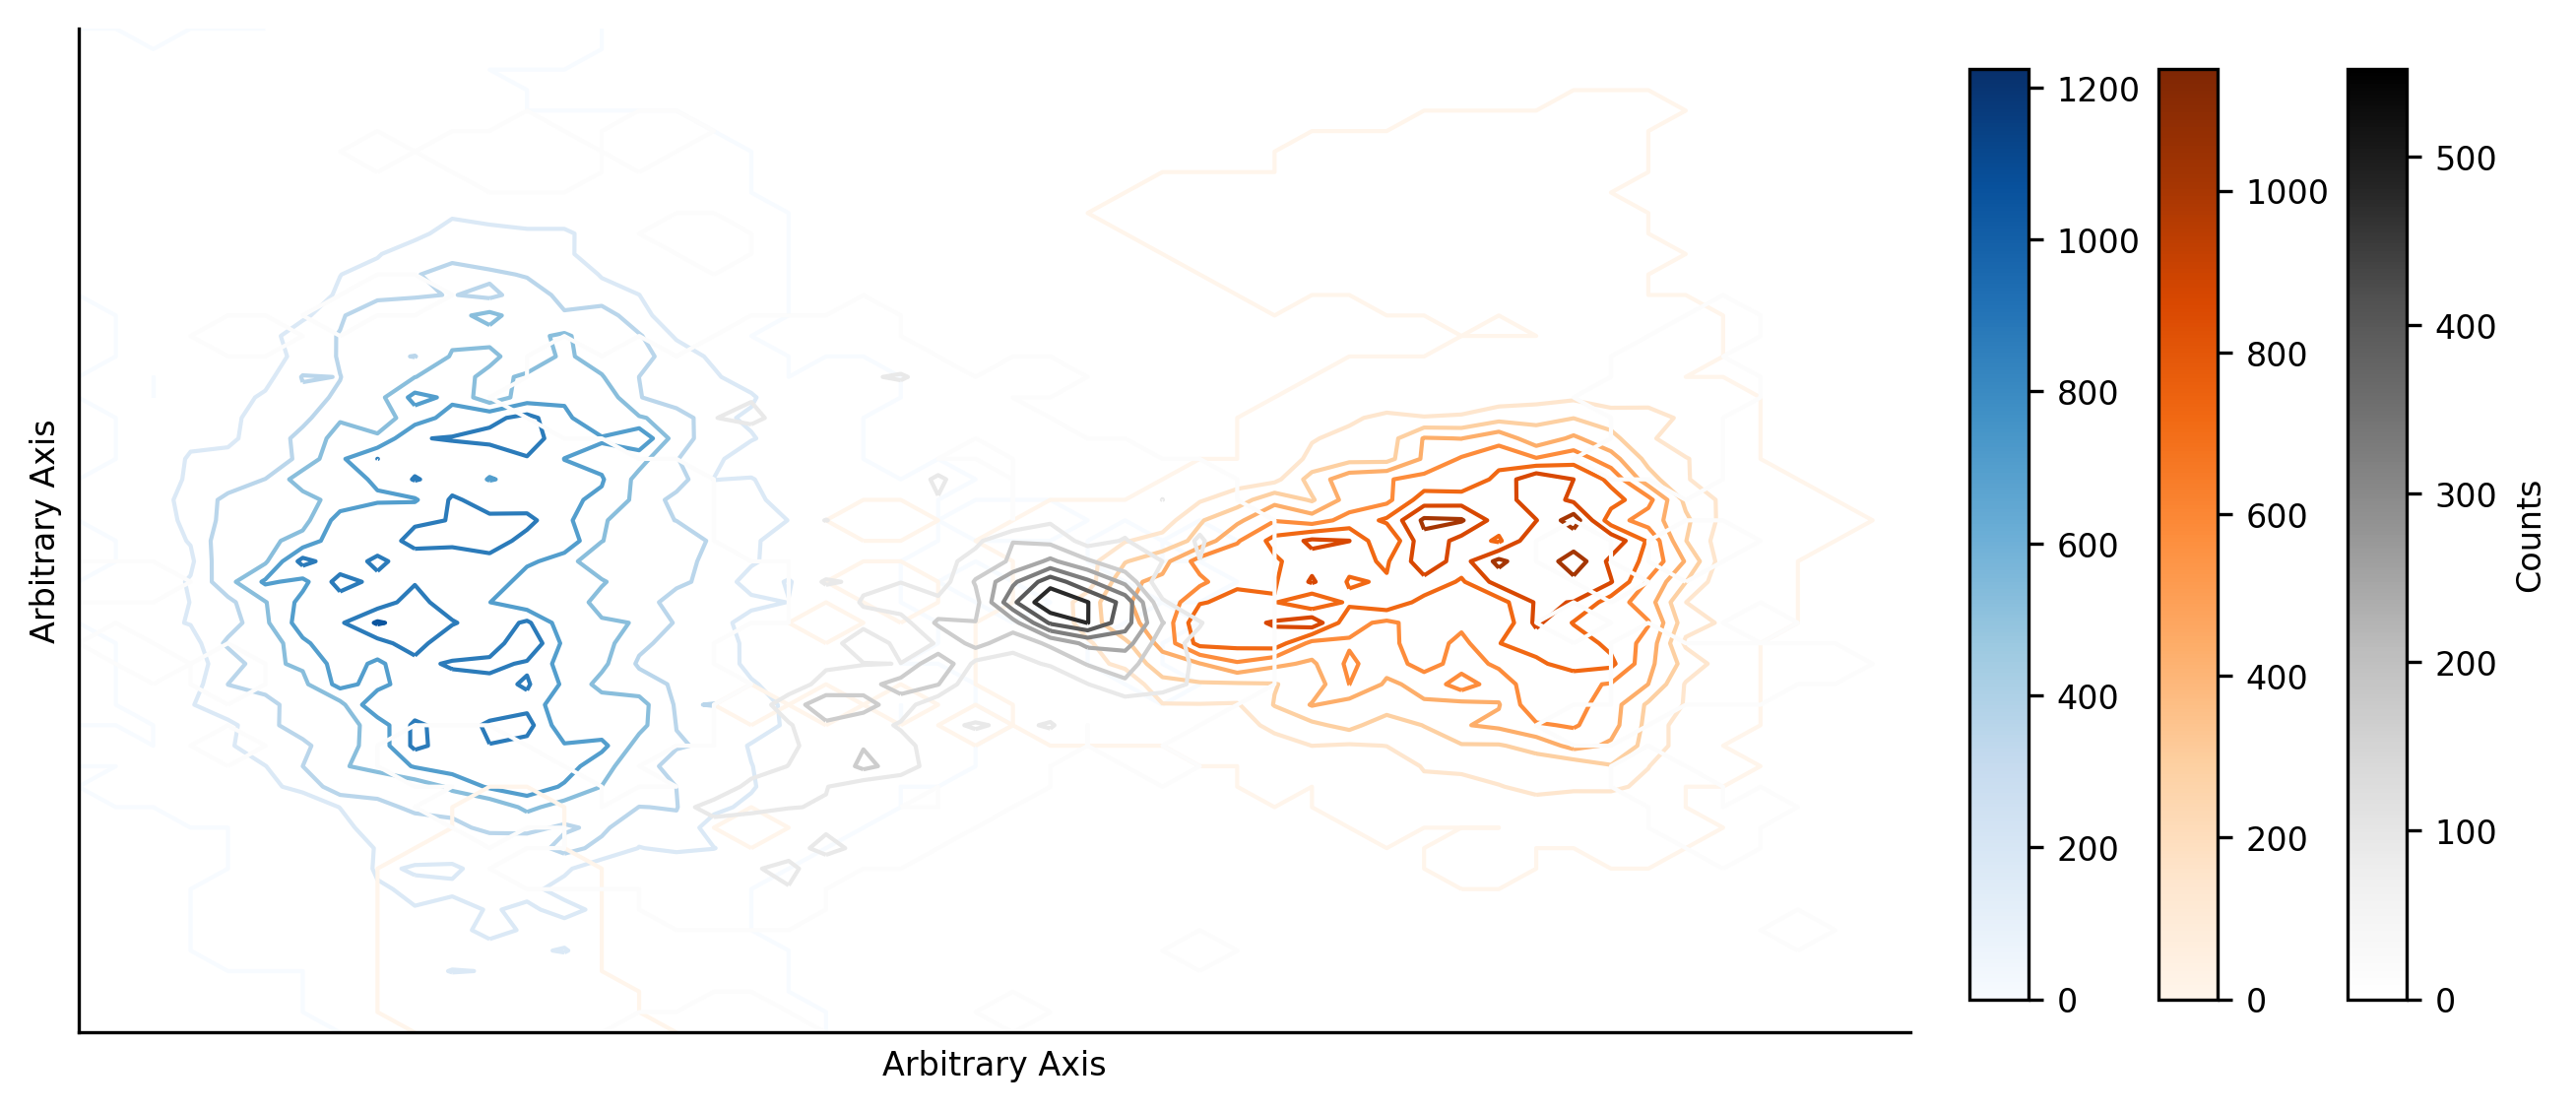

In [49]:
fig = plt.figure(figsize=(8,4.5),dpi=300)
ax = plt.subplot(111)

z,x,y = np.histogram2d(all_res_rot[all_res_rot.labels==0].umapx,
                       all_res_rot[all_res_rot.labels==0].umapy,
                       bins=50, range=[[-3,13],[0,12]])
x = [np.mean([i,j]) for i,j in zip(x[:-1],x[1:])]
y = [np.mean([i,j]) for i,j in zip(y[:-1],y[1:])]

Blues = mplcm.get_cmap('Blues')
Blues_norm = mpl.colors.Normalize(vmin=z.min(), vmax=z.max())

cont1 = ax.contour(x, y, z.T, levels=7, linewidths=1, cmap='Blues')

#######

z,x,y = np.histogram2d(all_res_rot[all_res_rot.labels==1].umapx,
                       all_res_rot[all_res_rot.labels==1].umapy,
                       bins=50, range=[[-3,13],[0,12]])
x = [np.mean([i,j]) for i,j in zip(x[:-1],x[1:])]
y = [np.mean([i,j]) for i,j in zip(y[:-1],y[1:])]

Oranges = mplcm.get_cmap('Oranges')
Oranges_norm = mpl.colors.Normalize(vmin=z.min(), vmax=z.max())

cont2 = ax.contour(x, y, z.T, levels=7, linewidths=1, cmap='Oranges')

#######

z,x,y = np.histogram2d(all_res_rot[all_res_rot.labels==-1].umapx,
                       all_res_rot[all_res_rot.labels==-1].umapy,
                       bins=50, range=[[-3,13],[0,12]])
x = [np.mean([i,j]) for i,j in zip(x[:-1],x[1:])]
y = [np.mean([i,j]) for i,j in zip(y[:-1],y[1:])]

Greys = mplcm.get_cmap('Greys')
Greys_norm = mpl.colors.Normalize(vmin=z.min(), vmax=z.max())

cont3 = ax.contour(x, y, z.T, levels=7, linewidths=1, cmap='Greys',vmin=-15)


cbaxes1 = fig.add_axes([0.925, 0.15, 0.025, 0.7,])
cbaxes2 = fig.add_axes([1.005, 0.15, 0.025, 0.7])
cbaxes3 = fig.add_axes([1.085, 0.15, 0.025, 0.7])

mpl.colorbar.ColorbarBase(cmap=Blues,ax=cbaxes1,norm=Blues_norm)
mpl.colorbar.ColorbarBase(cmap=Oranges,ax=cbaxes2,norm=Oranges_norm)
mpl.colorbar.ColorbarBase(cmap=Greys,ax=cbaxes3,norm=Greys_norm,label='Counts')

[getattr(ax,i)([]) for i in ['set_xticks','set_yticks']]
[getattr(ax,i)('Arbitrary Axis') for i in ['set_xlabel','set_ylabel']]
sns.despine()
plt.show()

The next step is trying to understand how this data is distributed in the $S_p$-to-$O^{7+}/O^{6+}$ space which we have been using to infer the physical origins of the solar wind.

To do so, we now plot each cluster as it's own occurance-density plot, showing how each cluster is distributed through the space. Perhaps unsurprisingly, we find that cluster 1 and 2 are distributed in much the same way as before, allowing us to make the same conclusions about their origins (coronal holes and the streamer-belt, respectively. We see that the cluster 3 data is distributed similarly to the cluster 3 obtained when we classified the whole Ulysses dataset, with a little more bias to the dense cluster 1 region.

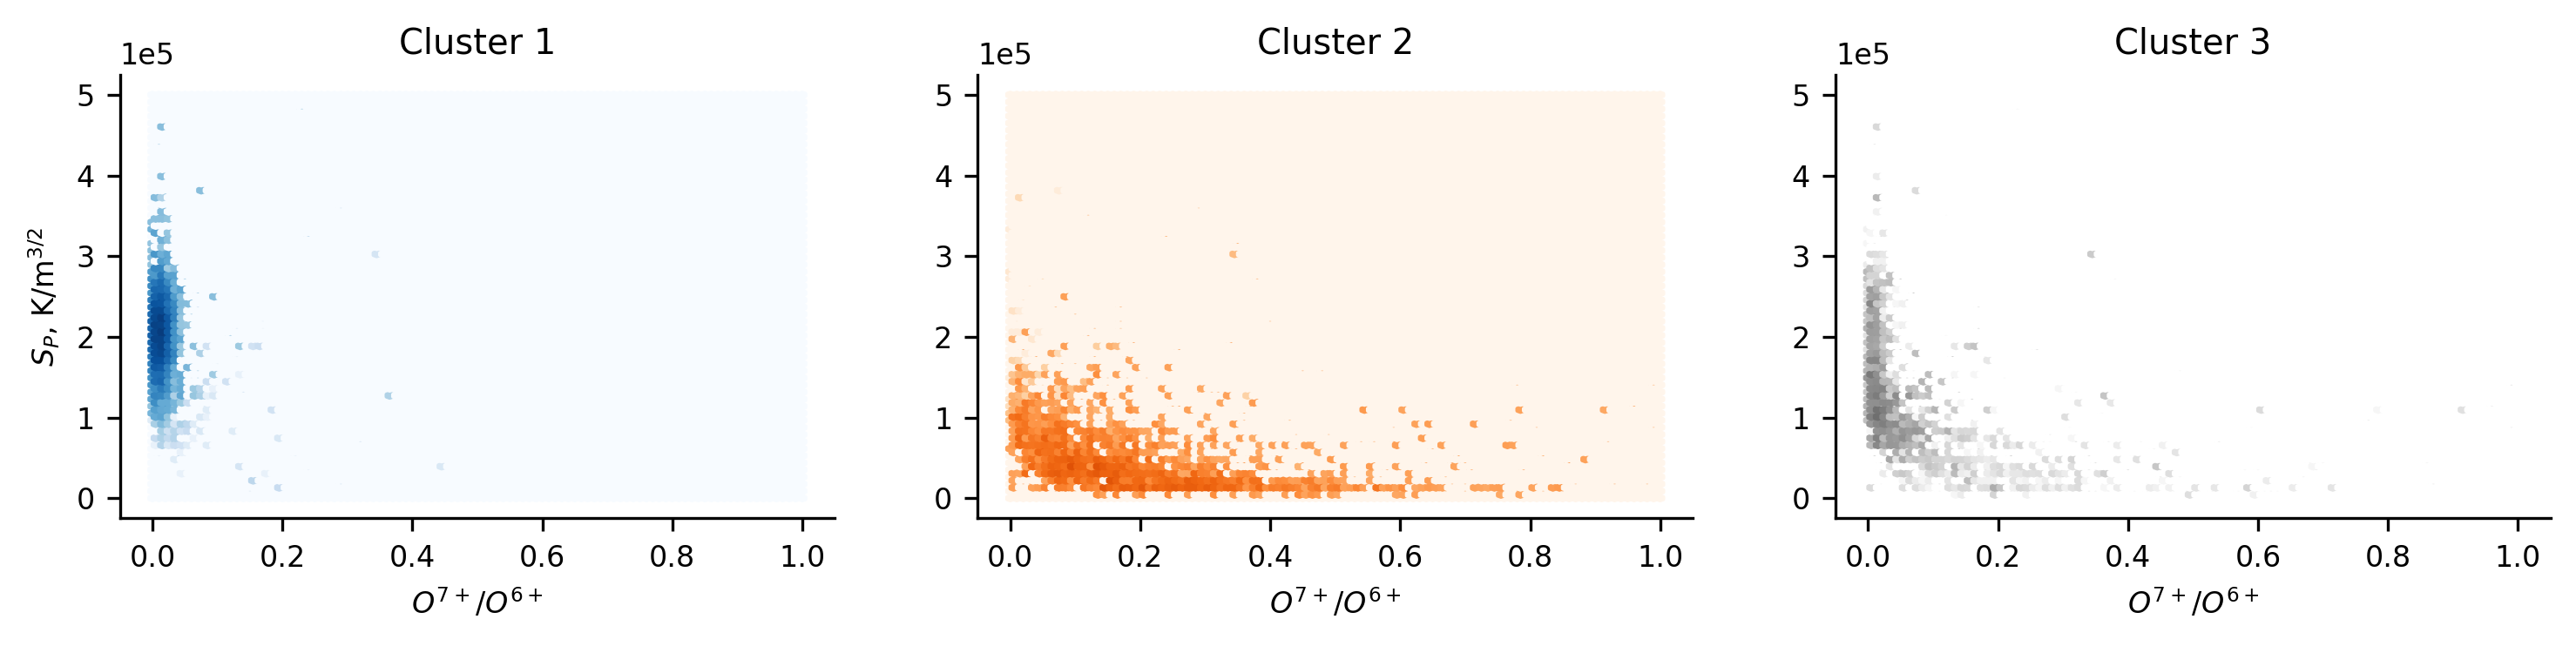

In [50]:
plt.figure(figsize=(12,2.25),dpi=300)
axs = [plt.subplot(1,3,i+1) for i in range(3)]

mins,maxs = 1,10000

axs[0].hexbin(all_res_rot[all_res_rot.labels==0].o7_o6,
           all_res_rot[all_res_rot.labels==0].Sp,
           gridsize=100, cmap='Blues',
           bins='log', extent=(0,1,0,5e+5),
           vmin=mins,vmax=maxs)

axs[1].hexbin(all_res_rot[all_res_rot.labels==1].o7_o6,
           all_res_rot[all_res_rot.labels==1].Sp,
           gridsize=100, cmap='Oranges',
           bins='log', extent=(0,1,0,5e+5),
           vmin=mins,vmax=maxs)

axs[2].hexbin(all_res_rot[all_res_rot.labels==-1].o7_o6,
           all_res_rot[all_res_rot.labels==-1].Sp,
           gridsize=100, cmap='Greys',
           bins='log', extent=(0,1,0,5e+5),
           vmin=mins,vmax=maxs)

[i.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
 for i in axs]

axs[0].set_ylabel('$S_P$, K/m$^{3/2}$')
[i.set_xlabel('$O^{7+}$/$O^{6+}$') for i in axs]
[i.set_title(j) for i,j in zip(axs,['Cluster 1', 'Cluster 2', 'Cluster 3'])]
sns.despine()
plt.show()

If we then look to see how the solar wind speed is distributed within the clusters, we find that what we would expect to be the coronal hole and streamer belt winds are distributed much as expected, looking almost identical to the initial clustering results. Cluster 3 is now present though, with a very broad distribution. Given the localisation of cluster 3 in the reduced space, we might have expected the speed distribution to be narrower. 

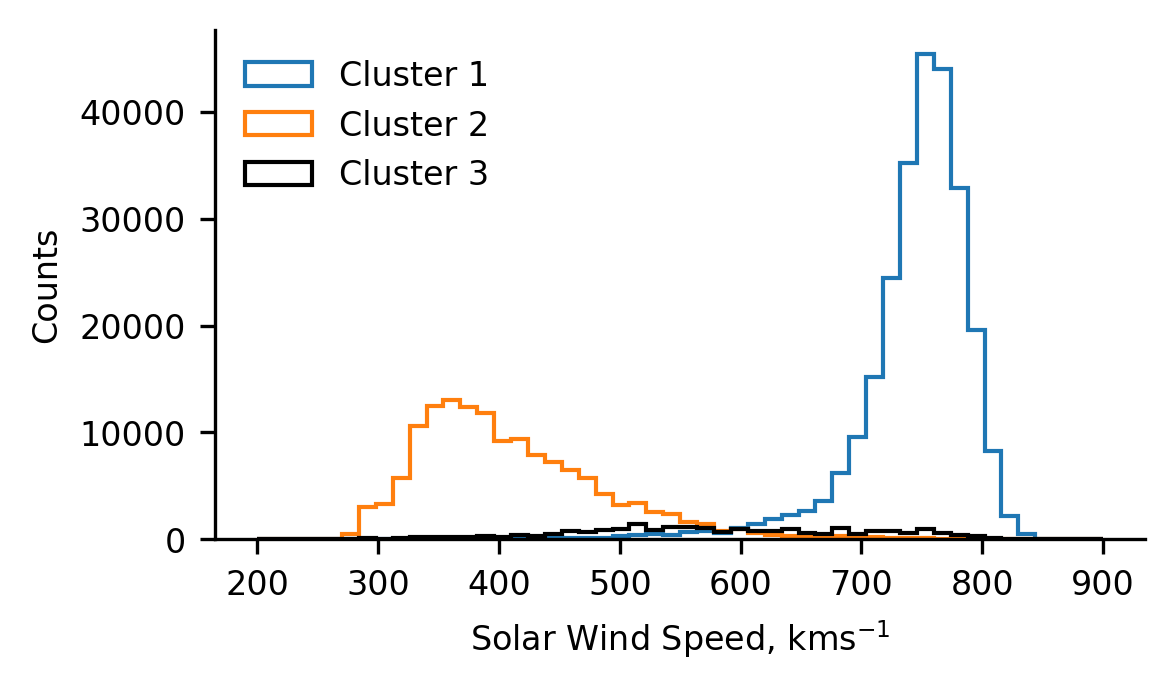

In [56]:
plt.figure(figsize=(4,2.25),dpi=300)
[plt.hist(all_res_rot[all_res_rot.labels==i].Vp, bins=50, range=(200,900),
          histtype='step', color=j, label=k)
 for i,j,k in zip([0,1,-1],['C0','C1','k'],
                  ['Cluster 1','Cluster 2','Cluster 3'])]

plt.ylabel('Counts')
plt.xlabel('Solar Wind Speed, kms$^{-1}$')
plt.legend(frameon=False,loc='upper left')
sns.despine()
plt.show()

Given the unexpectedly broad solar wind speed distribution of cluster 3, we now crudely isolate the cluster 3 data located about the densely populated region. To do so, we limit the cluster 3 data by it's x- and y-coordinate values in the reduced space. Using this data we can now compare the distribution of solar wind speed of cluster 3 as a whole, to that of the dense region. This will tell us if the results are being skewed by the data which is more sparsely located.

In [52]:
# Calculating the histogram values of the dense-region data
z1,_ = np.histogram(all_res_rot[(all_res_rot.labels==-1) &
                                (all_res_rot.umapx>=4.5) &
                                (all_res_rot.umapx<=7) &
                                (all_res_rot.umapy>=3.5) &
                                (all_res_rot.umapy<=7)].Vp,
                    bins=50, range=(200,900))

# Calculating the histogram of all the cluster 3 data
z2,bins = np.histogram(all_res_rot[all_res_rot.labels==-1].Vp,
                       bins=50, range=(200,900))

We can then plot the whole cluster 3 distribution, together with the distribution of the dense region and the residual between the two. The results of which highlight the presence of two component distributions making up cluster 3.

The black distribution represents the localised cluster 3 results. This distribution is more Gaussian the full cluster 3 distribution. The full distribution appears to have a secondary contribution from faster solar wind (as inferred from the residual distribution). Interestingly though, in the reduced space, we found that cluster 3 appeared to overlap more with cluster 2 than cluster 1. Suggesting conflicting sources for cluster 3.

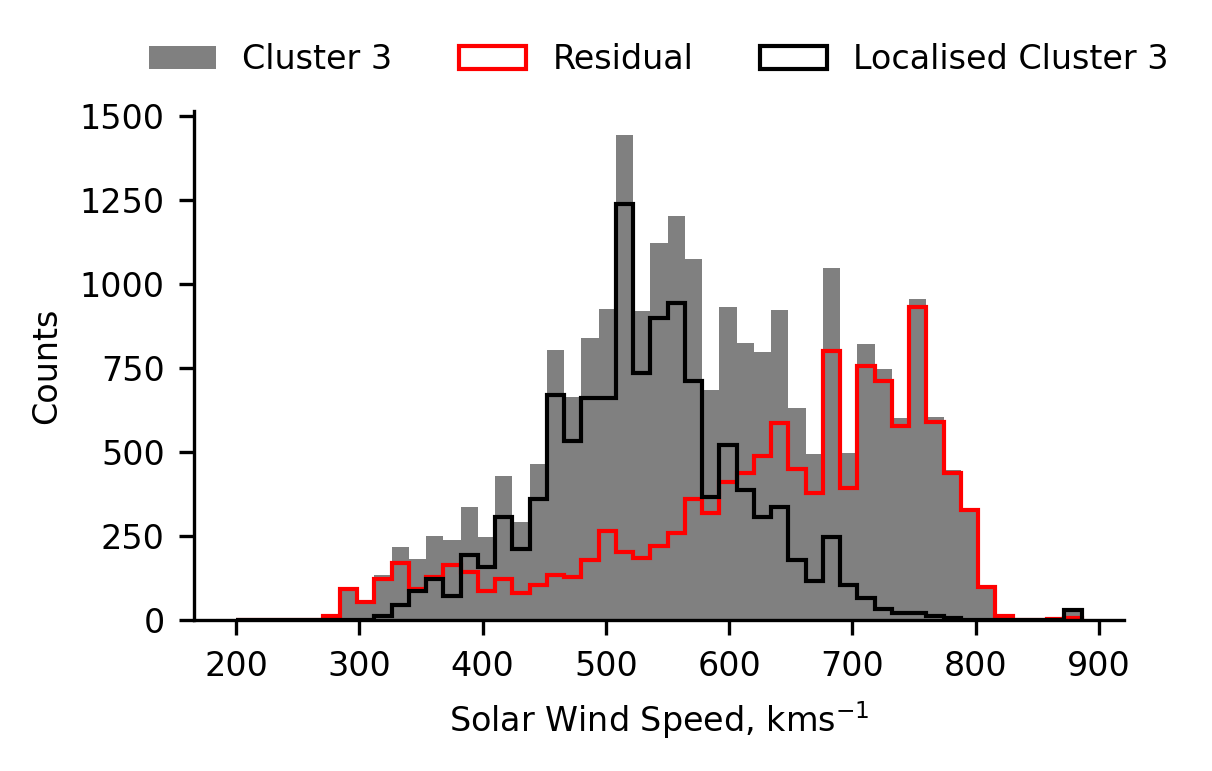

In [57]:
fig  = plt.figure(figsize=(4,2.25),dpi=300)
ax = plt.subplot()

ax.hist(np.arange(200,900,14),weights=z2, bins=bins[:-1],
         histtype='bar',color='grey',label='Cluster 3')

ax.hist(np.arange(200,900,14),weights=z2-z1, bins=bins[:-1],
         histtype='step',color='r',label='Residual')

ax.hist(np.arange(200,900,14),weights=z1, bins=bins[:-1],
         histtype='step',color='k',label='Localised Cluster 3')

plt.legend(frameon=False,loc='center',ncol=3,
           bbox_to_anchor=(0.5,1.1))

plt.ylabel('Counts')
plt.xlabel('Solar Wind Speed, kms$^{-1}$')
sns.despine()
plt.show()

If we look at the radial distribution of the data in cluster 3, we see a familiar trend of the results generally peaking in the ecliptic plane (the lowest radial distance). Though, since this data is only from the latitude scans, we can't compare the results to those at the aphelion portion of the orbit. But this result suggests again, that cluster 3 is more similar to cluster 1 than 2, despite the distribution in the reduced space.

An intriguing aspect of this plot are the two isolated peaks between 1.8 and 2.1 a.u. They appear to be somewhat significant features in the data, and might help to explain what the source of cluster 3 is. We explore them further, below.

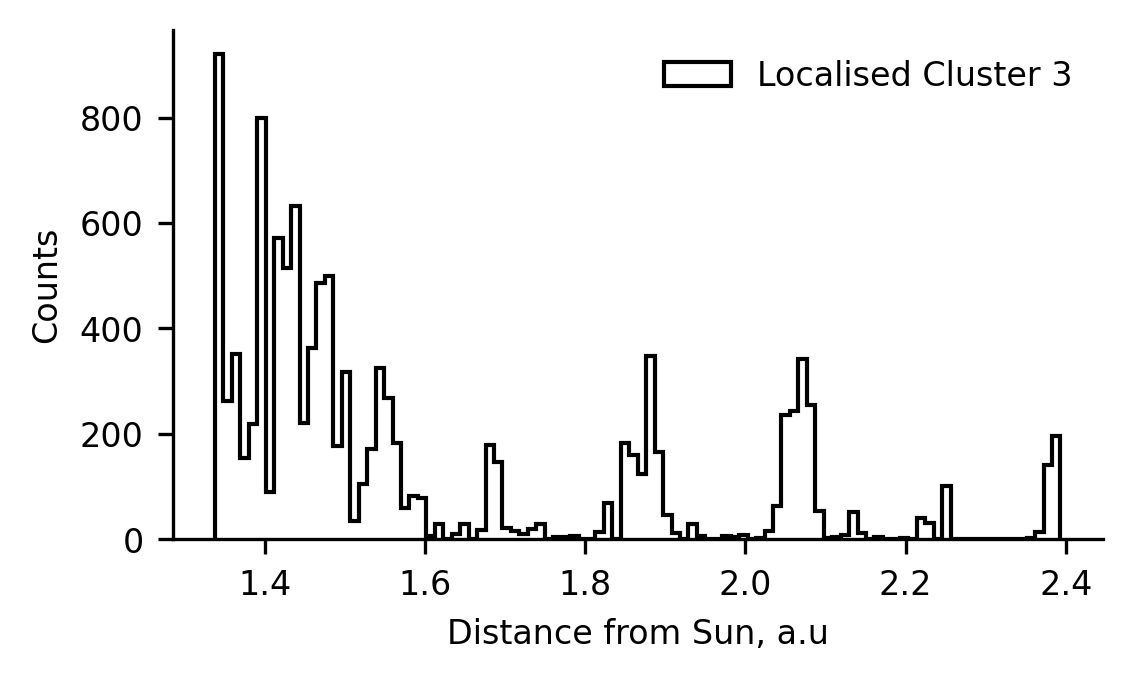

In [54]:
plt.figure(figsize=(4,2.25), dpi=300)

plt.hist(all_res_rot[(all_res_rot.labels==-1) &
                     (all_res_rot.umapx>=4.5) &
                     (all_res_rot.umapx<=7) &
                     (all_res_rot.umapy>=3.5) &
                     (all_res_rot.umapy<=7)].R,
         bins=100, histtype='step', color='k',
         label='Localised Cluster 3')

plt.ylabel('Counts')
plt.xlabel('Distance from Sun, a.u')
plt.legend(frameon=False)
sns.despine()
plt.show()

To isolate the data from the two peaks in the plot above, we limit ourselves to the data from a single ensemble member (7006 data-points). From this, we plot the timeseries of solar wind speed between 1.8-1.9 a.u., 1.9-2.0 a.u. and 2.0-2.1 a.u. Doing so allows us to compare the features present between the three, to determine if there is a tell as to the origin of the classification. Along with the timeseries, we also plot scatter points of cluster 3 below the timeseries for ease of identifying features.

Note that the timeseries cover the three latitude-scans and hence there are ~6 year gaps between each of the passes.

From the timeseries of the solar wind speeds, the main difference between the middle plot (where we don't expect cluster 3 data) and the upper and lower plots is during the slow-speed portion of the data. We can see that the upper and lower plots have speed peaks within the slow region. We see that the model oscilates between a cluster 2 and cluster 3 classification during this time period. From the ICME list presented by [Du, Zuo and Zhang (2010)](https://link.springer.com/article/10.1007/s11207-009-9505-8), we can identify the enhancement in the first panel to ICME number 87, though the other peak does not appear to coincide with a listed ICME. Cross-referencing the other cluster 3 data, it appears that some of it does coincide with listed ICMEs whilst some does not. This suggests that the cluster 3 data may come from a combination of ICMEs and other sources (such as stream interactions), or might pose as a novel ICME classifier (having found ICMEs not listed in other works).

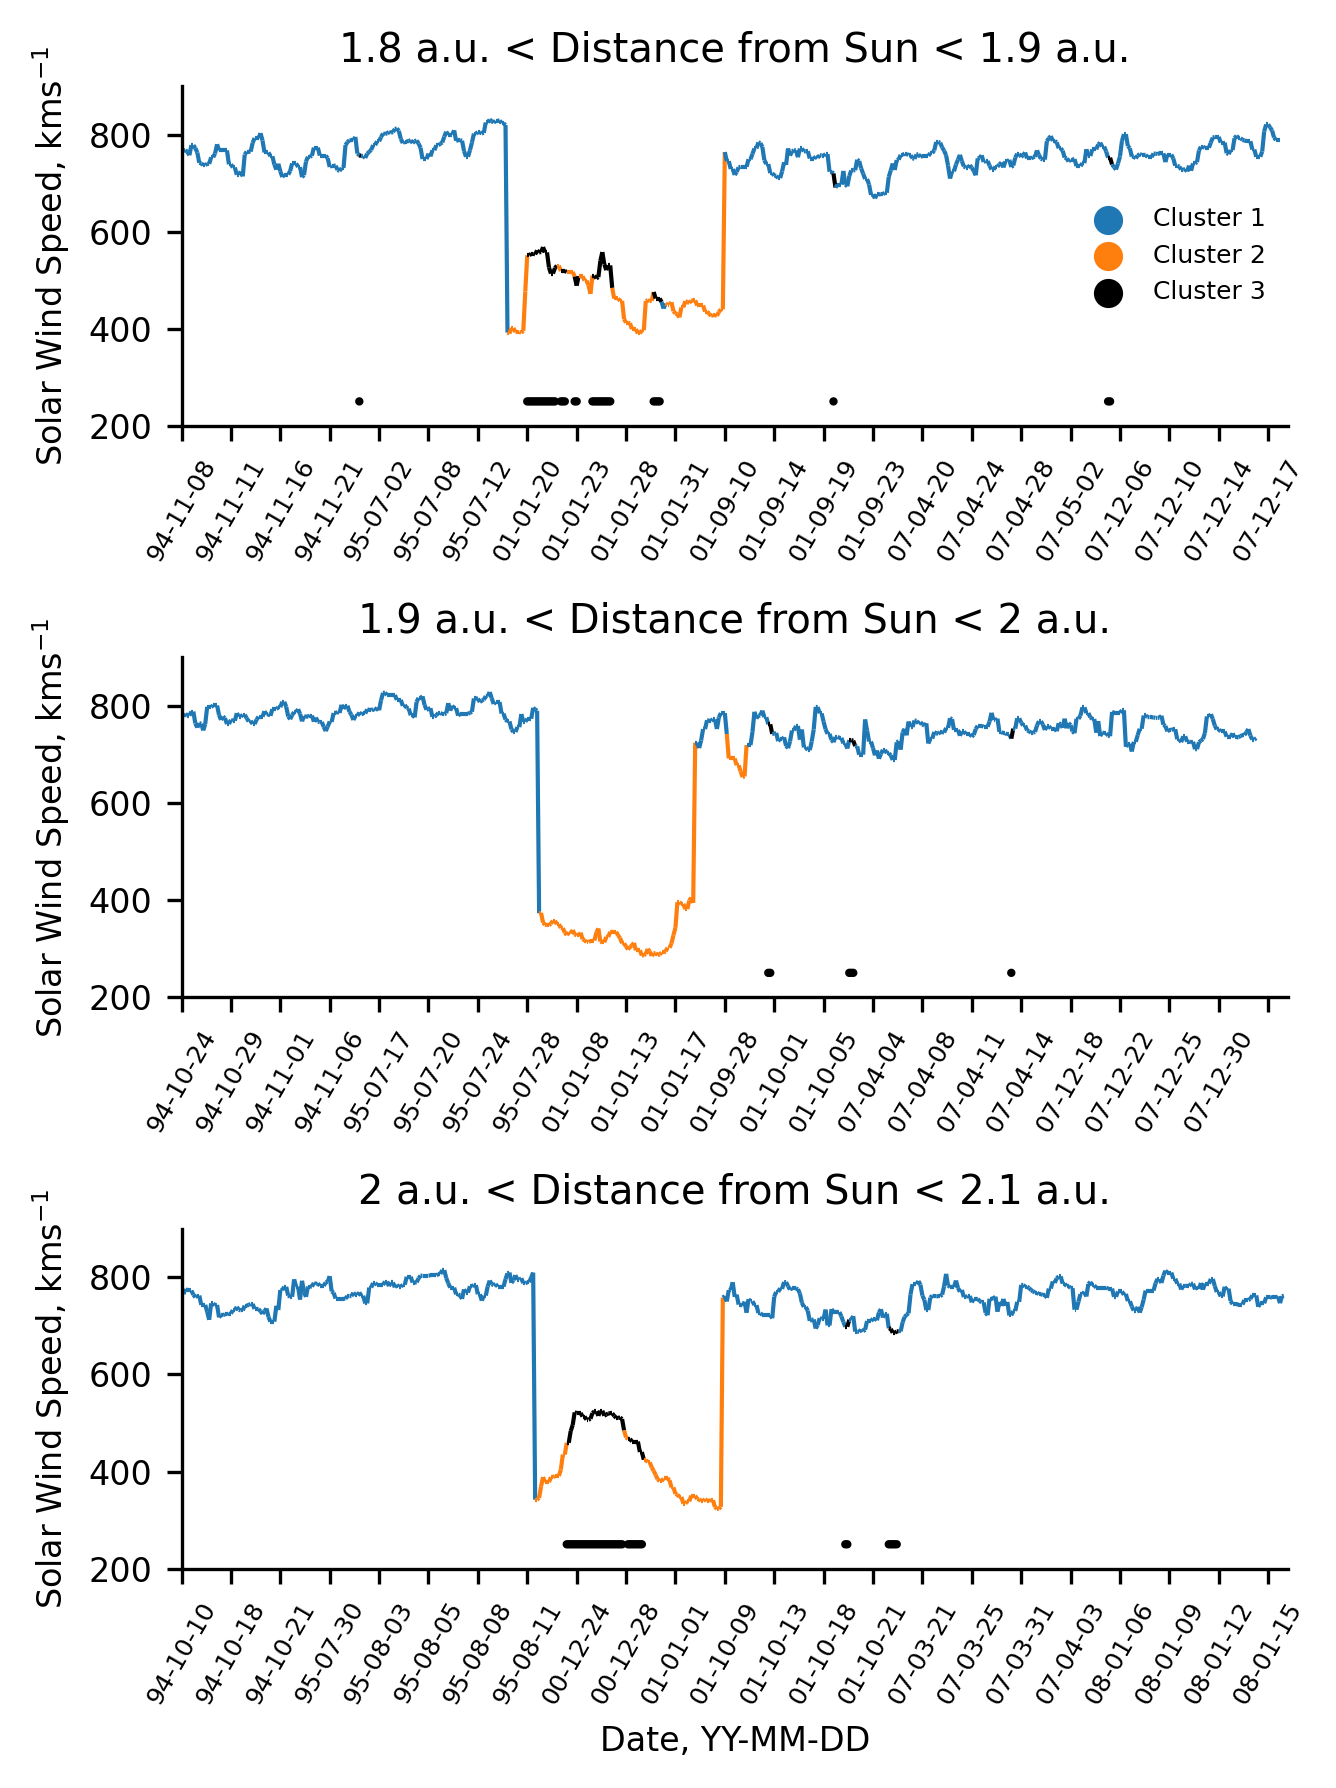

In [58]:
# Extract and sort data from one ensemble member.
r_data = all_res_rot[:7006].sort_values(by='Time',axis=0)
r_data['time_s'] = [i[2:10] for i in r_data.Time.values]

# Plot
plt.figure(figsize=(4.5,6),dpi=300)
axs = [plt.subplot(3,1,i+1) for i in range(3)]

# Plotting the speed timeseries
# Looping through axes and radial limits
for i,j,k in zip(axs,[1.8,1.9,2], [1.9,2,2.1]):
    data = r_data[(r_data.R > j) & (r_data.R < k)]
    # Creating line segments for plotting
    xpoints = np.arange(len(data)).reshape(-1,1,1)
    xpairs = np.concatenate([xpoints[:-1], xpoints[1:]],axis=1)
    ypoints = data.Vp.values.reshape(-1,1,1)
    ypairs = np.concatenate([ypoints[:-1], ypoints[1:]],axis=1)
    segments = np.concatenate([xpairs,ypairs],axis=2)
    colours = ['C0' if i==0 else 'C1' if i==1 else 'k'
                for i in data.labels]
    
    lc = mpl.collections.LineCollection(segments,antialiaseds=True,
                                        linewidth=1,
                                        colors=mpl.colors.to_rgba_array(colours))
    i.add_collection(lc)
    # Adding cluster 3 points below timeseries
    i.scatter(np.arange(len(data)),[250]*len(data),s=1,
              c=[i if i=='k' else [1,1,1,0] for i in colours])

[axs[0].scatter([],[],c=j,label=k)
 for j,k in zip(['C0','C1','k'],['Cluster 1', 'Cluster 2', 'Cluster 3'])]

# Formatting
[getattr(i,j)(k) for i in axs for j,k in zip(['set_xlim','set_ylim'],
                                             [[0,560],[200,900]])]
[i.set_xticks(np.arange(len(data))[::25]) for i in axs]
[i.set_xticklabels(r_data[(r_data.R > j) & (r_data.R < k)].time_s[::25])
 for i,j,k in zip(axs,[1.8,1.9,2], [1.9,2,2.1])]
[plt.setp(i.xaxis.get_majorticklabels(), rotation=60,fontsize=6) for i in axs]
[i.set_title('{} a.u. < Distance from Sun < {} a.u.'.format(j,k))
 for i,j,k in zip(axs,[1.8,1.9,2], [1.9,2,2.1])]
[i.set_ylabel('Solar Wind Speed, kms$^{-1}$') for i in axs]
axs[2].set_xlabel('Date, YY-MM-DD')
axs[0].legend(frameon=False,ncol=1,loc='right',fontsize='6')

plt.tight_layout()
sns.despine()
clear_output()
plt.show()

## Summary and Concluding Remarks

This notebook and the work published in [Bloch et al. (2020)](https://link.springer.com/article/10.1007/s11207-020-01609-z) present novel applications of unsupervised machine learning to the outstanding problem of solar wind classification. Through two different, independent methods we identify two main groupings which are consistent with coronal hole wind and streamer belt wind. Both our methods present a third grouping in the data which is difficult to interpret. From our ensemble approach with UMAP, we have see that some of this data corresponds to ICMEs, though not all of it. Other aspects of the analysis imply that the data could be assosciated with stream-interaction regions.

By stepping through the analysis process in this chapter, we hope to have highlighted some of the methodology that is required to succesfully utilise unsupervised techniques. These techniques can be very complex (i.e., UMAP) and so require significant caution and domain knowledge to apply in appropriate ways.